# Output analysis

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from model.model_nile import ModelNile
from experimentation.data_generation import generate_input_data
from plotter import HydroModelPlotter

Read the results of the optimization:

In [3]:
opt_results = pd.read_csv("../outputs/baseline_results.csv").drop(columns= "Unnamed: 0")
opt_results

v0        v1        v2        v3        v4        v5        v6  \
0   0.024197  0.769617  0.922287  0.284390  0.285430  0.882037  0.307263   
1   0.029319  0.506760  0.922052  0.281349  0.126591  0.316678  0.325800   
2   0.029319  0.506760  0.922052  0.281349  0.126604  0.316678  0.325864   
3   0.015403  0.481073  0.907694  0.278863  0.128145  0.316678  0.299147   
4   0.001483  0.509103  0.460031  0.332911  0.128063  0.320411  0.309537   
..       ...       ...       ...       ...       ...       ...       ...   
61  0.015359  0.506143  0.306483  0.351127  0.101188  0.315801  0.304501   
62  0.015289  0.479807  0.373970  0.350829  0.100907  0.311332  0.302132   
63  0.015412  0.503607  0.376069  0.351174  0.100501  0.314419  0.303898   
64  0.007323  0.508647  0.494135  0.332006  0.126029  0.314232  0.308419   
65  0.015331  0.507441  0.375786  0.350811  0.100319  0.315881  0.304076   

          v7        v8        v9  ...      v160      v161      v162      v163  \
0   0.701721  0.239721  0.517846  ...  0.875497  0.855204  0.184055  0.735560   
1   0.067708  0.815296  0.037682  ...  0.931945  0.821761  0.182298  0.753519   
2   0.067708  0.815296  0.037682  ...  0.931945  0.821761  0.147271  0.757846   
3   0.544401  0.775920  0.025087  ...  0.875032  0.481493  0.147639  0.757988   
4   0.592765  0.356095  0.023885  ...  0.881293  0.512839  0.924978  0.760192   
..       ...       ...       ...  ...       ...       ...       ...       ...   
61  0.045277  0.795471  0.026298  ...  0.823247  0.490705  0.950725  0.757854   
62  0.005730  0.150160  0.007621  ...  0.813620  0.490375  0.919493  0.735737   
63  0.005481  0.143280  0.026780  ...  0.819148  0.489873  0.889579  0.757363   
64  0.647974  0.412725  0.025233  ...  0.875464  0.490704  0.951032  0.758111   
65  0.631483  0.111516  0.027315  ...  0.818810  0.490561  0.921593  0.757839   

       egypt_irr   egypt_90  egypt_low_had  sudan_irr  sudan_90  \
0     606.008182   0.000000       0.000000        0.0       0.0   
1    4550.076712   0.000000       0.033333        0.0       0.0   
2    1312.873142   0.000000       0.000000        0.0       0.0   
3    1712.990239   0.000000       0.000000        0.0       0.0   
4    6163.006720   0.000000       0.004167        0.0       0.0   
..           ...        ...            ...        ...       ...   
61  11071.486658  86.436333       0.016667        0.0       0.0   
62  10824.975233  59.676222       0.025000        0.0       0.0   
63  10583.532635  60.947709       0.029167        0.0       0.0   
64   7286.073865   0.000000       0.020833        0.0       0.0   
65  10006.129175  67.770403       0.041667        0.0       0.0   

    ethiopia_hydro  
0     2.505726e+07  
1     5.311349e+07  
2     5.303868e+07  
3     5.304743e+07  
4     5.307082e+07  
..             ...  
61    5.318961e+07  
62    5.318227e+07  
63    5.318194e+07  
64    5.314925e+07  
65    5.316875e+07  

[66 rows x 170 columns]

In [4]:
policies, objectives = opt_results.iloc[:, :-6], opt_results.iloc[:, -6:]

In [5]:
objectives.describe()

egypt_irr    egypt_90  egypt_low_had  sudan_irr  sudan_90  \
count     66.000000   66.000000      66.000000       66.0      66.0   
mean    8769.647145   46.096382       0.019823        0.0       0.0   
std     2842.041255   42.119316       0.012491        0.0       0.0   
min      606.008182    0.000000       0.000000        0.0       0.0   
25%     7026.223048    0.000000       0.012500        0.0       0.0   
50%    10210.156467   51.306016       0.016667        0.0       0.0   
75%    10775.225528   75.972913       0.029167        0.0       0.0   
max    12219.724278  137.765221       0.045833        0.0       0.0   

       ethiopia_hydro  
count    6.600000e+01  
mean     5.272022e+07  
std      3.457719e+06  
min      2.505726e+07  
25%      5.311887e+07  
50%      5.316355e+07  
75%      5.317916e+07  
max      5.319143e+07

Let's kick out the Sudan objectives as they are always zero:

In [6]:
objectives = objectives.drop(columns=["sudan_90","sudan_irr"])

In [7]:
best_obj_indices = dict()
directions = ["min", "min", "min", "max"]

for i, obj in enumerate(objectives):
    if directions[i] == "min":
        indexes = objectives.loc[objectives[obj] == objectives[obj].min(),:].index
    elif directions[i] == "max":
        indexes = objectives.loc[objectives[obj] == objectives[obj].max(),:].index
    else: print("issue with directions!")
        
    best_obj_indices[obj] = indexes

In [8]:
best_obj_indices

{'egypt_irr': Int64Index([0], dtype='int64'),
 'egypt_90': Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 16, 17, 18, 19, 22,
             23, 24, 25, 29, 30, 32, 36, 64],
            dtype='int64'),
 'egypt_low_had': Int64Index([0, 2, 3, 5, 8, 16], dtype='int64'),
 'ethiopia_hydro': Int64Index([14], dtype='int64')}

In [9]:
best_egypt = policies.loc[0]
best_ethiopia = policies.loc[14]

Before redoing the simulation with found policies, let's do some objectives visualization:

### Parallel Coordinates Plot

In [10]:
def normalize_objs(df, directions):
    desirability_couples = list()
    working_df = df.copy()
    for i, col in enumerate(df.columns):
        if directions[i] == "min": best, worst = df[col].min(), df[col].max()
        elif directions[i] == "max": best, worst = df[col].max(), df[col].min()
        desirability_couples.append((worst, best))
        working_df[col] = (df[col] - worst) / (best - worst)
        
    return working_df, desirability_couples

Objective values are normalised such that the most desirable value becomes 1 whilst the least desirable becomes 0.

In [11]:
norm_df, desire_couples = normalize_objs(
    objectives, ["min", "min", "min", "max"]
)

In [12]:
norm_df["class"] = "solutions"
norm_df.at[0,"class"] = "Best Egypt"
norm_df.at[14,"class"] = "Best Ethiopia"

In [13]:
fig, ax = plt.subplots()
parallel_coordinates(norm_df, "class", ax=ax, color=["red",
    "grey",
    "blue"])
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

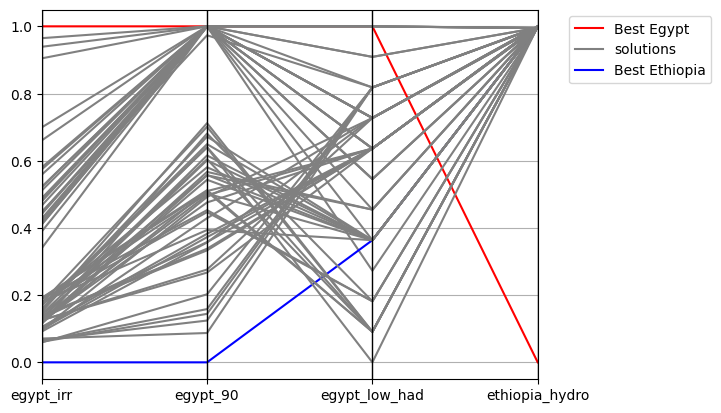

In [14]:
plt.show()

In [15]:
def find_compromise_solutions(objectives_norm_df, percentile):
    index_lists = []
    for col in objectives_norm_df.columns:
        threshold = np.percentile(objectives_norm_df[col], percentile)
        index_lists.append(objectives_norm_df.loc[objectives_norm_df[col] >= threshold, :].index)
        
    common_indices = []
    for i in objectives_norm_df.index:
        counter = 0
        for check_list in index_lists:
            if i not in check_list: break
            counter += 1
        if counter == len(index_lists):
            common_indices.append(i)
        
    return common_indices
    

In [34]:
find_compromise_solutions(norm_df.iloc[:,:-1], 35)

[11, 22, 24, 32, 36, 64]

In [30]:
compromise_1 = policies.loc[24]
compromise_2 = policies.loc[32]

In [51]:
norm_df.at[24,"class"] = "Compromise Solution 1"
norm_df.at[32,"class"] = "Compromise Solution 2"

In [ ]:
norm_df.loc[norm_df["egypt_90"] < 0.6]

In [60]:
egypt_90_low_policy = policies.loc[31]
norm_df.at[31,"class"] = "Diversity Solution"

In [61]:
fig, ax = plt.subplots()
parallel_coordinates(norm_df.loc[[0,14, 24, 32, 31],:], "class", ax=ax, color=[
    "red",
    "blue",
    "green",
    "purple",
    "orange"
])
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

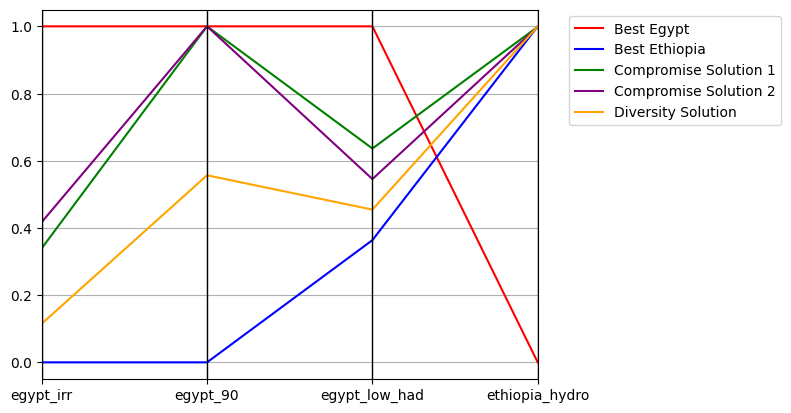

In [62]:
plt.show()

In [63]:
policies

v0        v1        v2        v3        v4        v5        v6  \
0   0.024197  0.769617  0.922287  0.284390  0.285430  0.882037  0.307263   
1   0.029319  0.506760  0.922052  0.281349  0.126591  0.316678  0.325800   
2   0.029319  0.506760  0.922052  0.281349  0.126604  0.316678  0.325864   
3   0.015403  0.481073  0.907694  0.278863  0.128145  0.316678  0.299147   
4   0.001483  0.509103  0.460031  0.332911  0.128063  0.320411  0.309537   
..       ...       ...       ...       ...       ...       ...       ...   
61  0.015359  0.506143  0.306483  0.351127  0.101188  0.315801  0.304501   
62  0.015289  0.479807  0.373970  0.350829  0.100907  0.311332  0.302132   
63  0.015412  0.503607  0.376069  0.351174  0.100501  0.314419  0.303898   
64  0.007323  0.508647  0.494135  0.332006  0.126029  0.314232  0.308419   
65  0.015331  0.507441  0.375786  0.350811  0.100319  0.315881  0.304076   

          v7        v8        v9  ...      v154      v155      v156      v157  \
0   0.701721  0.239721  0.517846  ...  0.143174  0.098266  0.455793  0.553373   
1   0.067708  0.815296  0.037682  ...  0.143420  0.098344  0.373319  0.574591   
2   0.067708  0.815296  0.037682  ...  0.143420  0.098344  0.373319  0.575130   
3   0.544401  0.775920  0.025087  ...  0.143420  0.098409  0.373985  0.556952   
4   0.592765  0.356095  0.023885  ...  0.144422  0.098018  0.350447  0.575997   
..       ...       ...       ...  ...       ...       ...       ...       ...   
61  0.045277  0.795471  0.026298  ...  0.135245  0.098246  0.483278  0.532249   
62  0.005730  0.150160  0.007621  ...  0.144034  0.097982  0.446291  0.537469   
63  0.005481  0.143280  0.026780  ...  0.170889  0.097954  0.540614  0.572796   
64  0.647974  0.412725  0.025233  ...  0.144247  0.098071  0.689061  0.573236   
65  0.631483  0.111516  0.027315  ...  0.135185  0.098247  0.463325  0.535739   

        v158      v159      v160      v161      v162      v163  
0   0.380468  0.861627  0.875497  0.855204  0.184055  0.735560  
1   0.381020  0.393812  0.931945  0.821761  0.182298  0.753519  
2   0.381020  0.863358  0.931945  0.821761  0.147271  0.757846  
3   0.435399  0.399839  0.875032  0.481493  0.147639  0.757988  
4   0.375566  0.427722  0.881293  0.512839  0.924978  0.760192  
..       ...       ...       ...       ...       ...       ...  
61  0.443298  0.386264  0.823247  0.490705  0.950725  0.757854  
62  0.374007  0.429980  0.813620  0.490375  0.919493  0.735737  
63  0.373373  0.425287  0.819148  0.489873  0.889579  0.757363  
64  0.372855  0.492296  0.875464  0.490704  0.951032  0.758111  
65  0.365596  0.421693  0.818810  0.490561  0.921593  0.757839  

[66 rows x 164 columns]

In [66]:
policies_for_exploration = policies.loc[[0,14, 24, 32, 31],:]
policies_for_exploration["name"] = ["best_egypt","best_ethiopia","compromise_1",
                                    "compromise_2","diversity"]
policies_for_exploration

v0        v1        v2        v3        v4        v5        v6  \
0   0.024197  0.769617  0.922287  0.284390  0.285430  0.882037  0.307263   
14  0.016957  0.506500  0.440243  0.352212  0.126729  0.267913  0.304350   
24  0.007689  0.507382  0.492836  0.331573  0.127279  0.316960  0.308044   
32  0.007323  0.508647  0.370199  0.332006  0.127420  0.314290  0.295874   
31  0.017480  0.508613  0.378588  0.351158  0.099970  0.316045  0.302790   

          v7        v8        v9  ...      v155      v156      v157      v158  \
0   0.701721  0.239721  0.517846  ...  0.098266  0.455793  0.553373  0.380468   
14  0.576664  0.754838  0.040749  ...  0.098752  0.464347  0.574432  0.377196   
24  0.028089  0.768612  0.024949  ...  0.105750  0.688886  0.574683  0.375734   
32  0.647974  0.412725  0.025233  ...  0.098071  0.689061  0.573201  0.372855   
31  0.601991  0.429581  0.025234  ...  0.096977  0.465788  0.573198  0.441752   

        v159      v160      v161      v162      v163           name  
0   0.861627  0.875497  0.855204  0.184055  0.735560     best_egypt  
14  0.429541  0.875584  0.523487  0.953321  0.771948  best_ethiopia  
24  0.493095  0.877207  0.490985  0.966743  0.757903   compromise_1  
32  0.492296  0.875464  0.490704  0.950674  0.758022   compromise_2  
31  0.429953  0.872579  0.488856  0.951078  0.757885      diversity  

[5 rows x 165 columns]

In [69]:
policies_for_exploration.to_csv("../outputs/policies_exploration.csv", index=False)

In [70]:
new_df = pd.read_csv("../outputs/policies_exploration.csv")
new_df

v0        v1        v2        v3        v4        v5        v6  \
0  0.024197  0.769617  0.922287  0.284390  0.285430  0.882037  0.307263   
1  0.016957  0.506500  0.440243  0.352212  0.126729  0.267913  0.304350   
2  0.007689  0.507382  0.492836  0.331573  0.127279  0.316960  0.308044   
3  0.007323  0.508647  0.370199  0.332006  0.127420  0.314290  0.295874   
4  0.017480  0.508613  0.378588  0.351158  0.099970  0.316045  0.302790   

         v7        v8        v9  ...      v155      v156      v157      v158  \
0  0.701721  0.239721  0.517846  ...  0.098266  0.455793  0.553373  0.380468   
1  0.576664  0.754838  0.040749  ...  0.098752  0.464347  0.574432  0.377196   
2  0.028089  0.768612  0.024949  ...  0.105750  0.688886  0.574683  0.375734   
3  0.647974  0.412725  0.025233  ...  0.098071  0.689061  0.573201  0.372855   
4  0.601991  0.429581  0.025234  ...  0.096977  0.465788  0.573198  0.441752   

       v159      v160      v161      v162      v163           name  
0  0.861627  0.875497  0.855204  0.184055  0.735560     best_egypt  
1  0.429541  0.875584  0.523487  0.953321  0.771948  best_ethiopia  
2  0.493095  0.877207  0.490985  0.966743  0.757903   compromise_1  
3  0.492296  0.875464  0.490704  0.950674  0.758022   compromise_2  
4  0.429953  0.872579  0.488856  0.951078  0.757885      diversity  

[5 rows x 165 columns]

In [21]:
sns.pairplot(norm_df.iloc[:,:-1]) # -1 not to take the class column

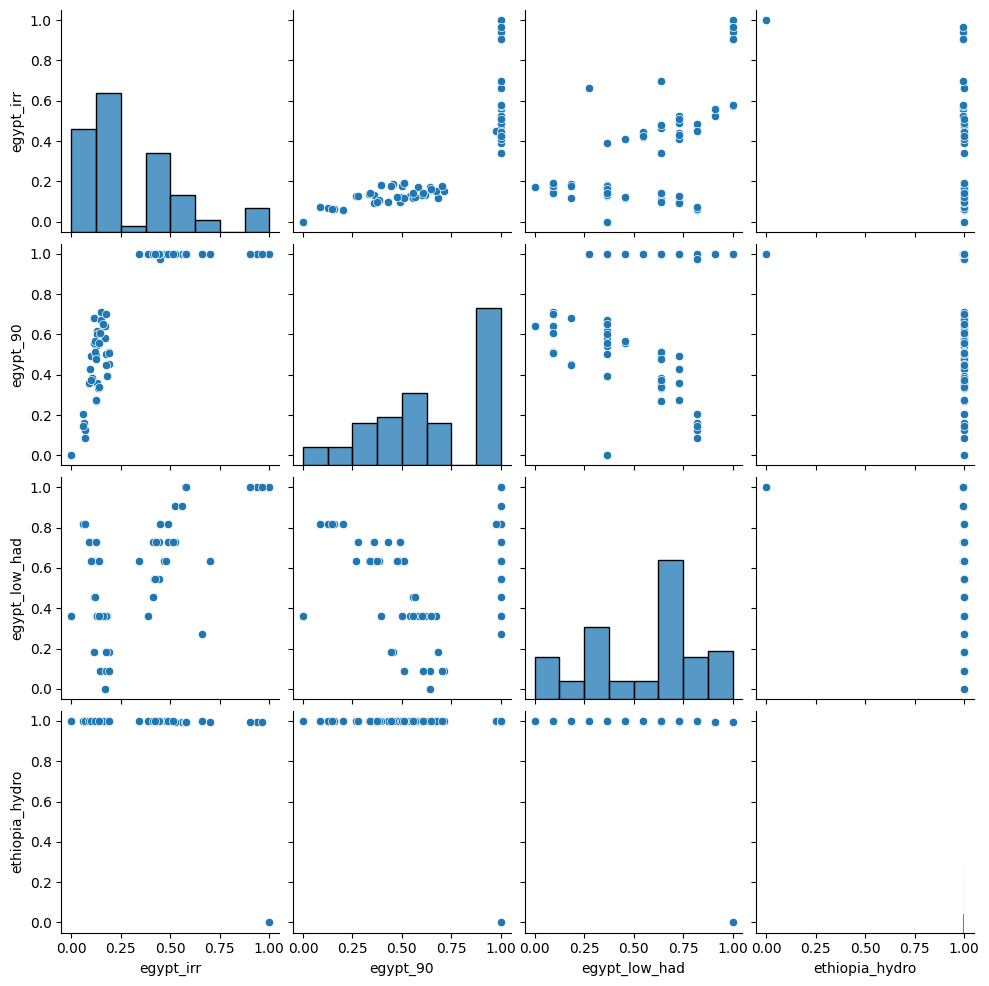

In [22]:
plt.show()

In [23]:
print("Best Egypt")
print(dict(objectives.loc[0]))
print("Best Ethiopia")
print(dict(objectives.loc[14]))
print("Compromise 1")
print(dict(objectives.loc[24]))
print("Compromise 2")
print(dict(objectives.loc[32]))

Best Egypt
{'egypt_irr': 606.0081821744743, 'egypt_90': 0.0, 'egypt_low_had': 0.0, 'ethiopia_hydro': 25057259.404181264}
Best Ethiopia
{'egypt_irr': 12219.724277558644, 'egypt_90': 137.76522078393145, 'egypt_low_had': 0.0291666666666666, 'ethiopia_hydro': 53191428.31634329}
Compromise 1
{'egypt_irr': 8277.249258268655, 'egypt_90': 0.0, 'egypt_low_had': 0.0166666666666666, 'ethiopia_hydro': 53152010.25810746}
Compromise 2
{'egypt_irr': 7373.0704141070755, 'egypt_90': 0.0, 'egypt_low_had': 0.0208333333333333, 'ethiopia_hydro': 53152673.92905507}


In [24]:
secondly_def_rate = dict(objectives.loc[14])["egypt_irr"]
((secondly_def_rate / 20) * 3600 * 24 * 365) * 1e-9

19.268061240854472

In [25]:
total_mwh_generation = dict(objectives.loc[14])["ethiopia_hydro"]
(total_mwh_generation / 20) * 1e-6

2.659571415817165

In [26]:
test_policies = [best_egypt, best_ethiopia, compromise_1, compromise_2]
policy_names = ["Best Egypt", "Best Ethiopia", "Compromise Solution 1", "Compromise Solution 2"]

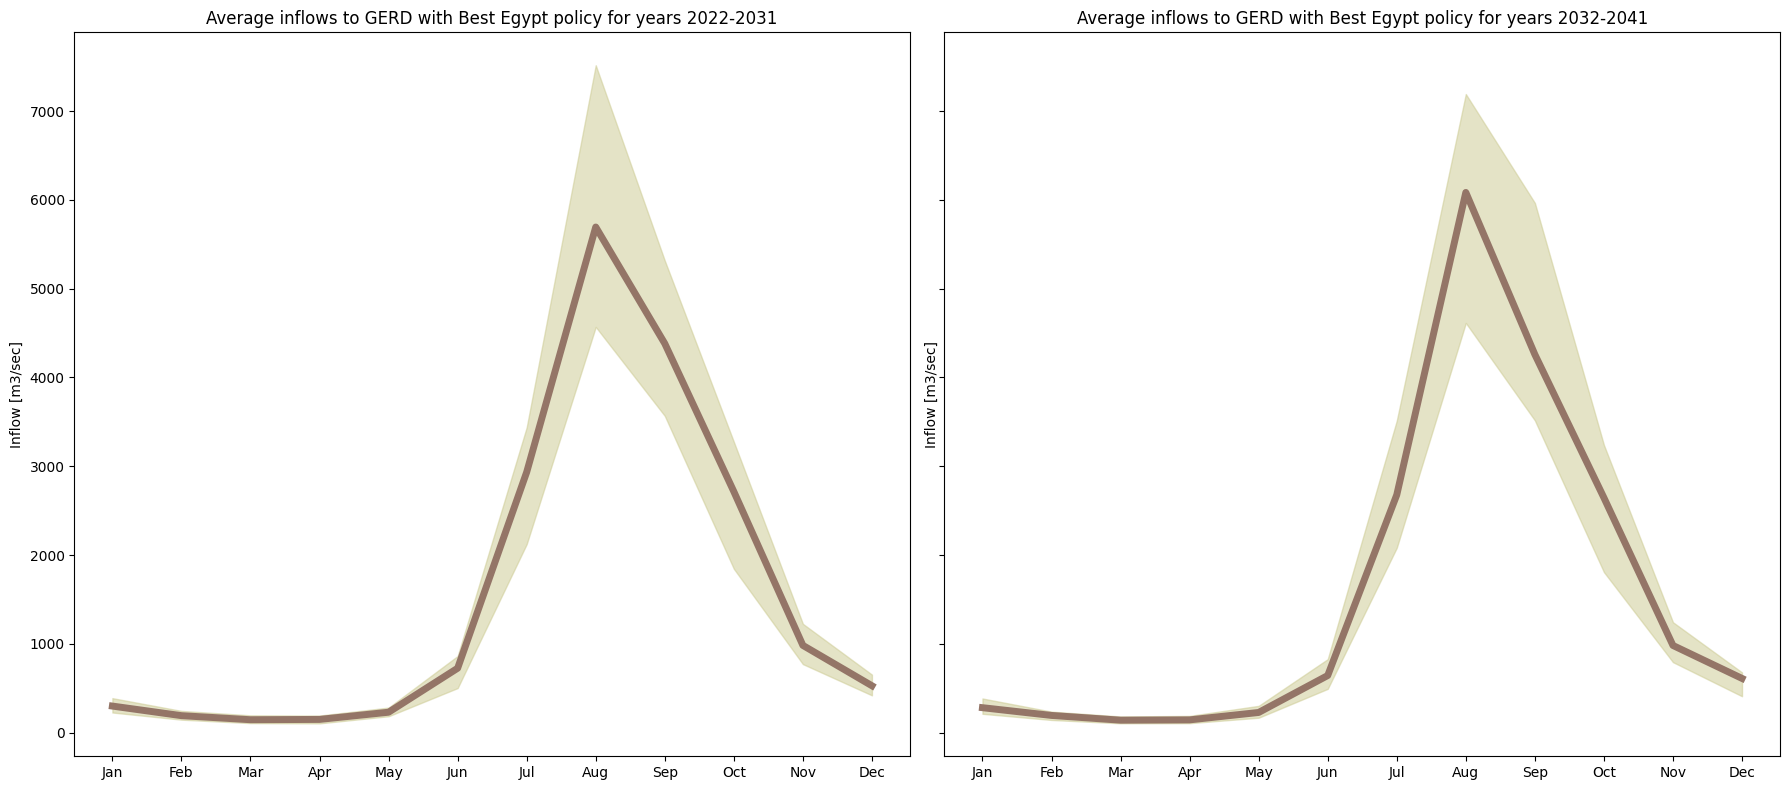

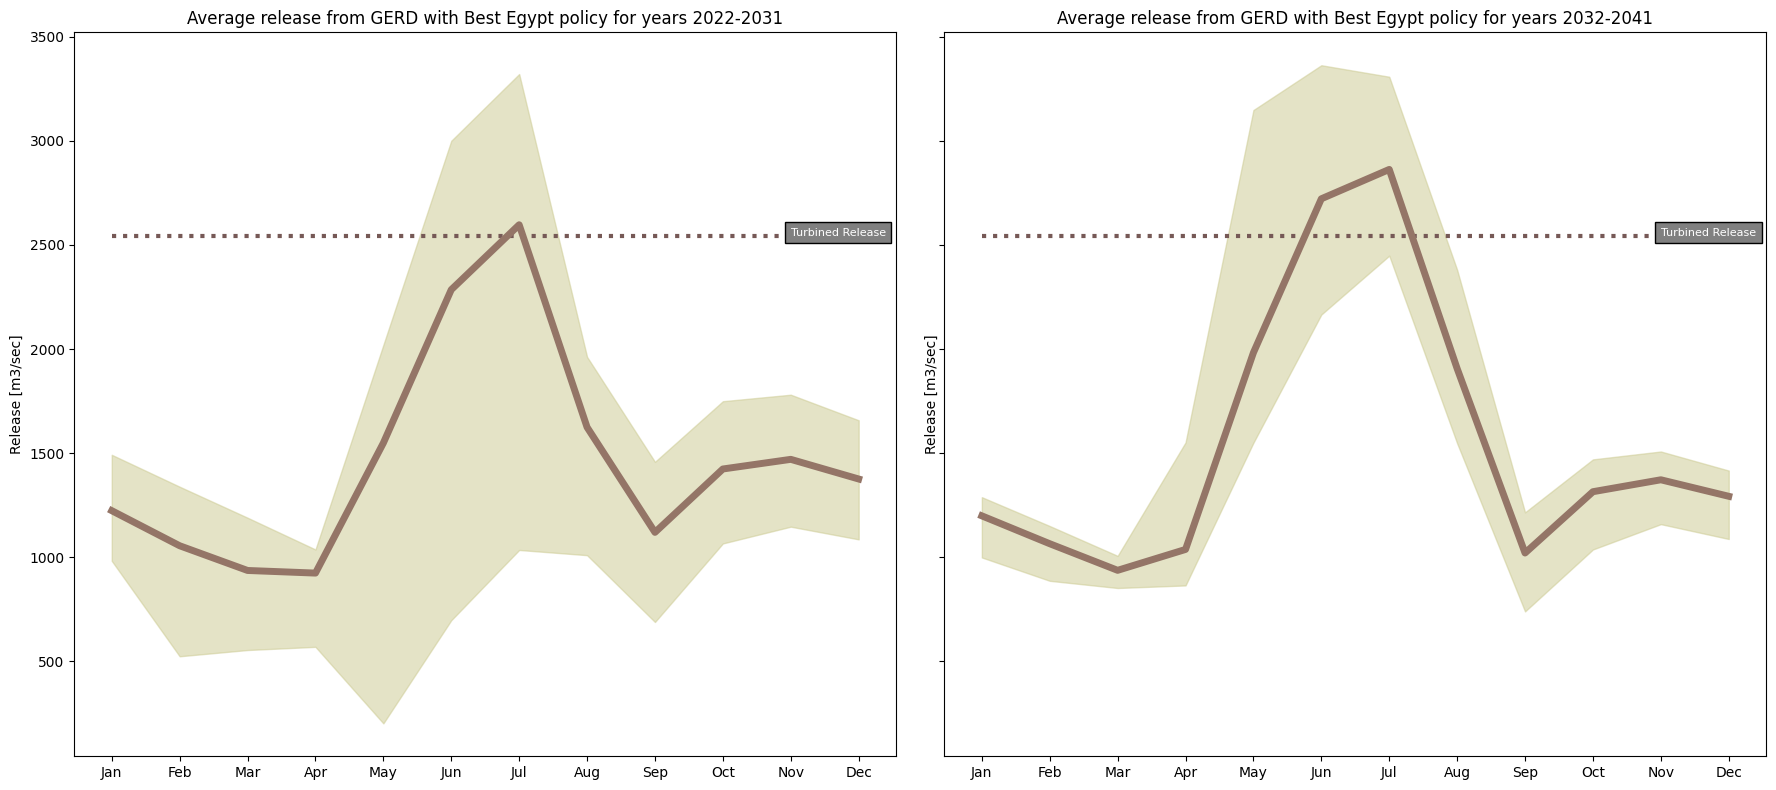

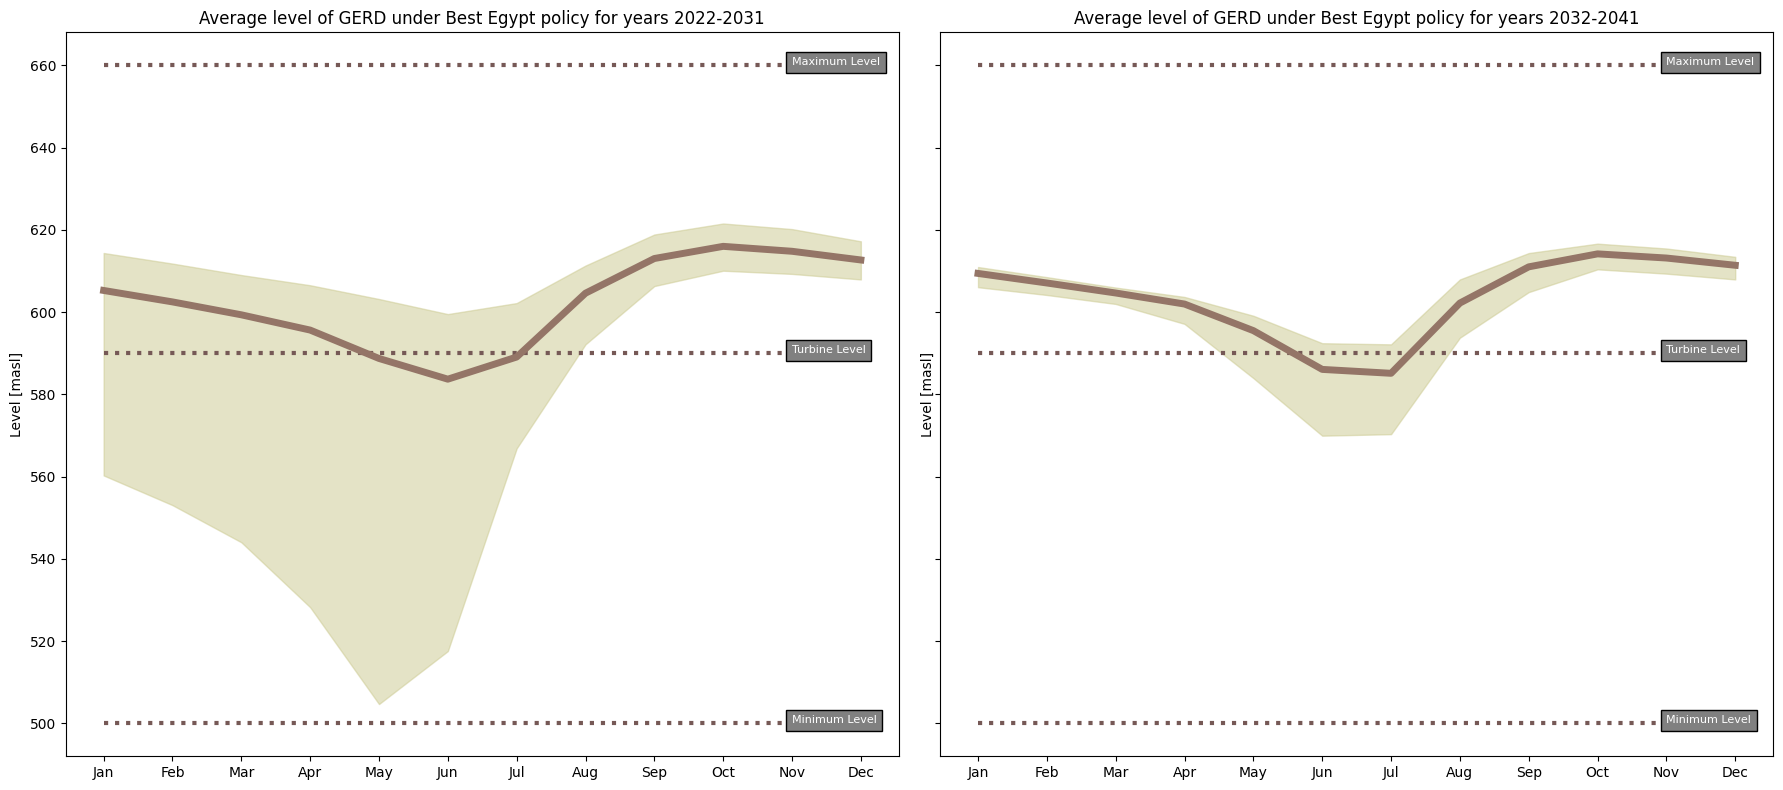

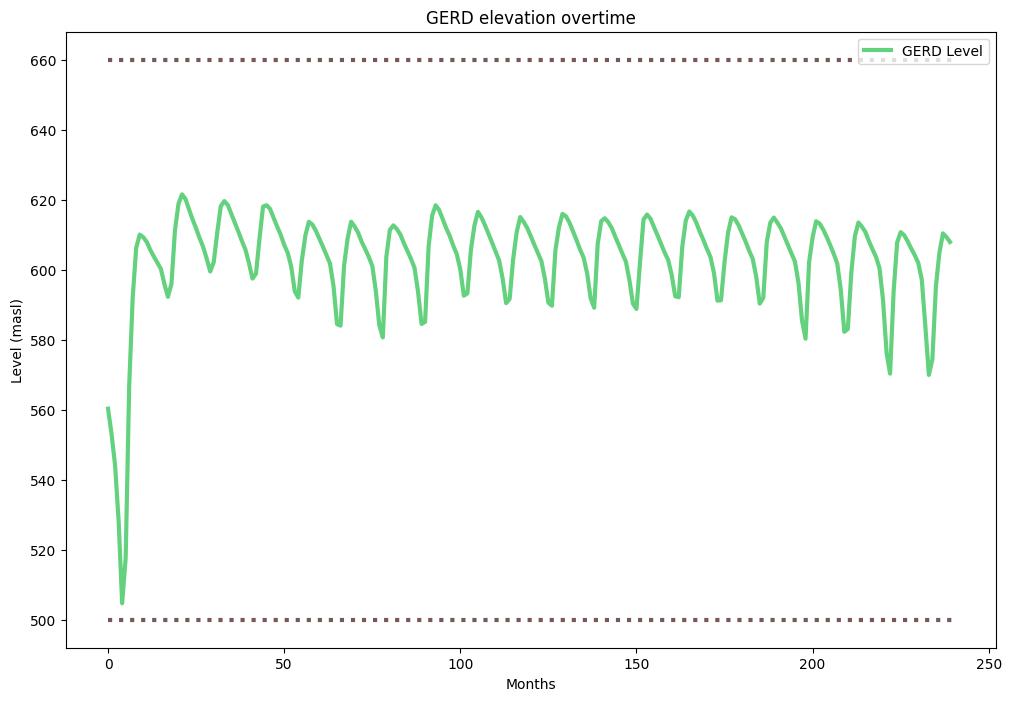

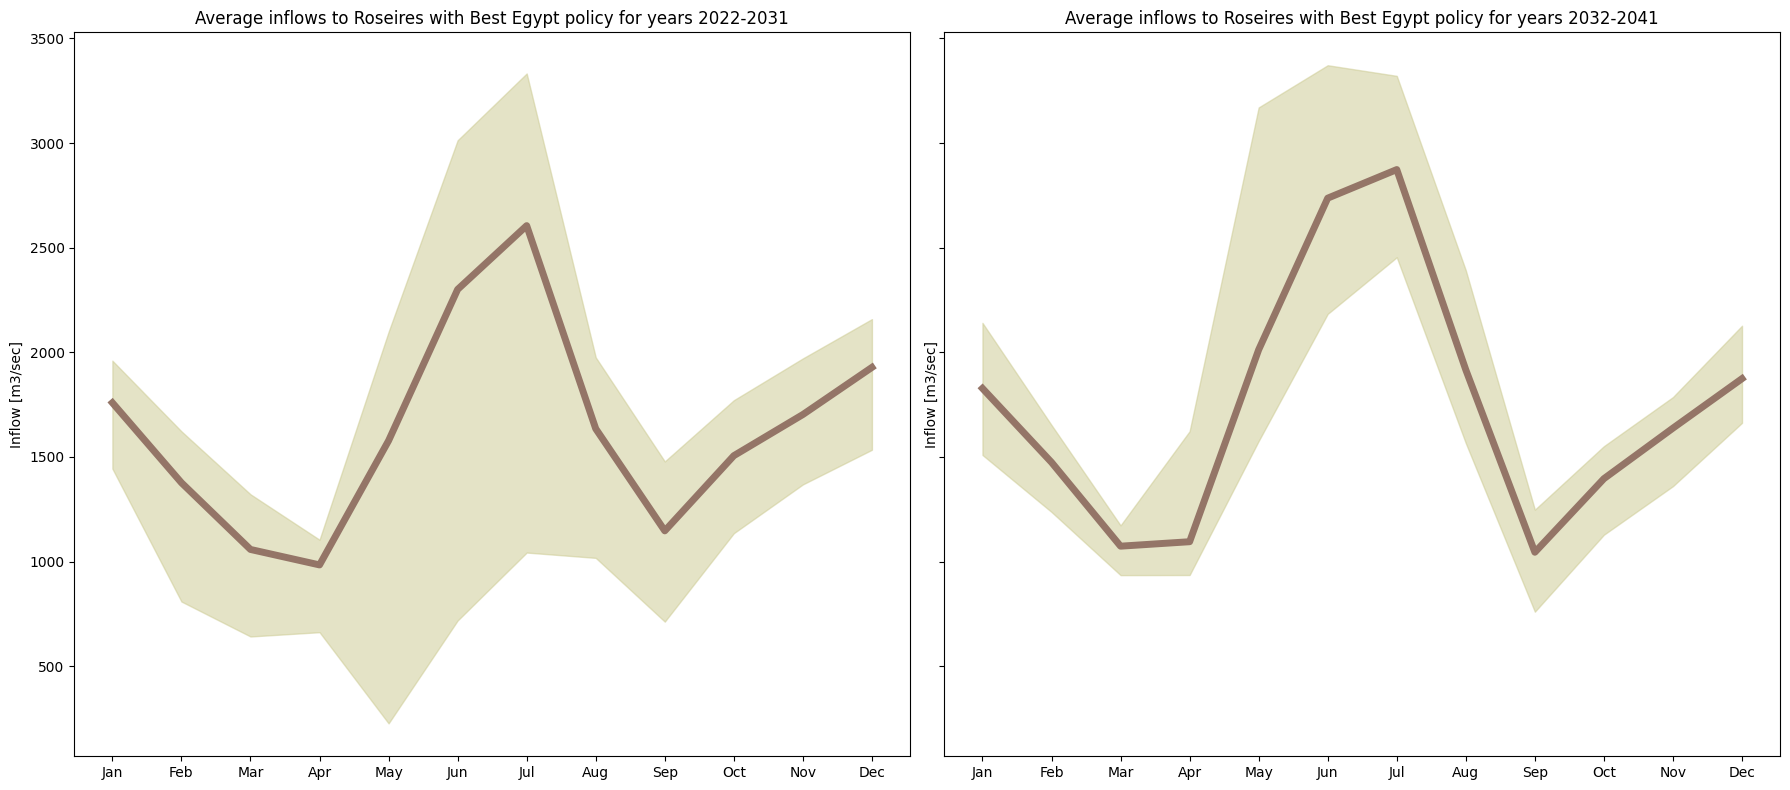

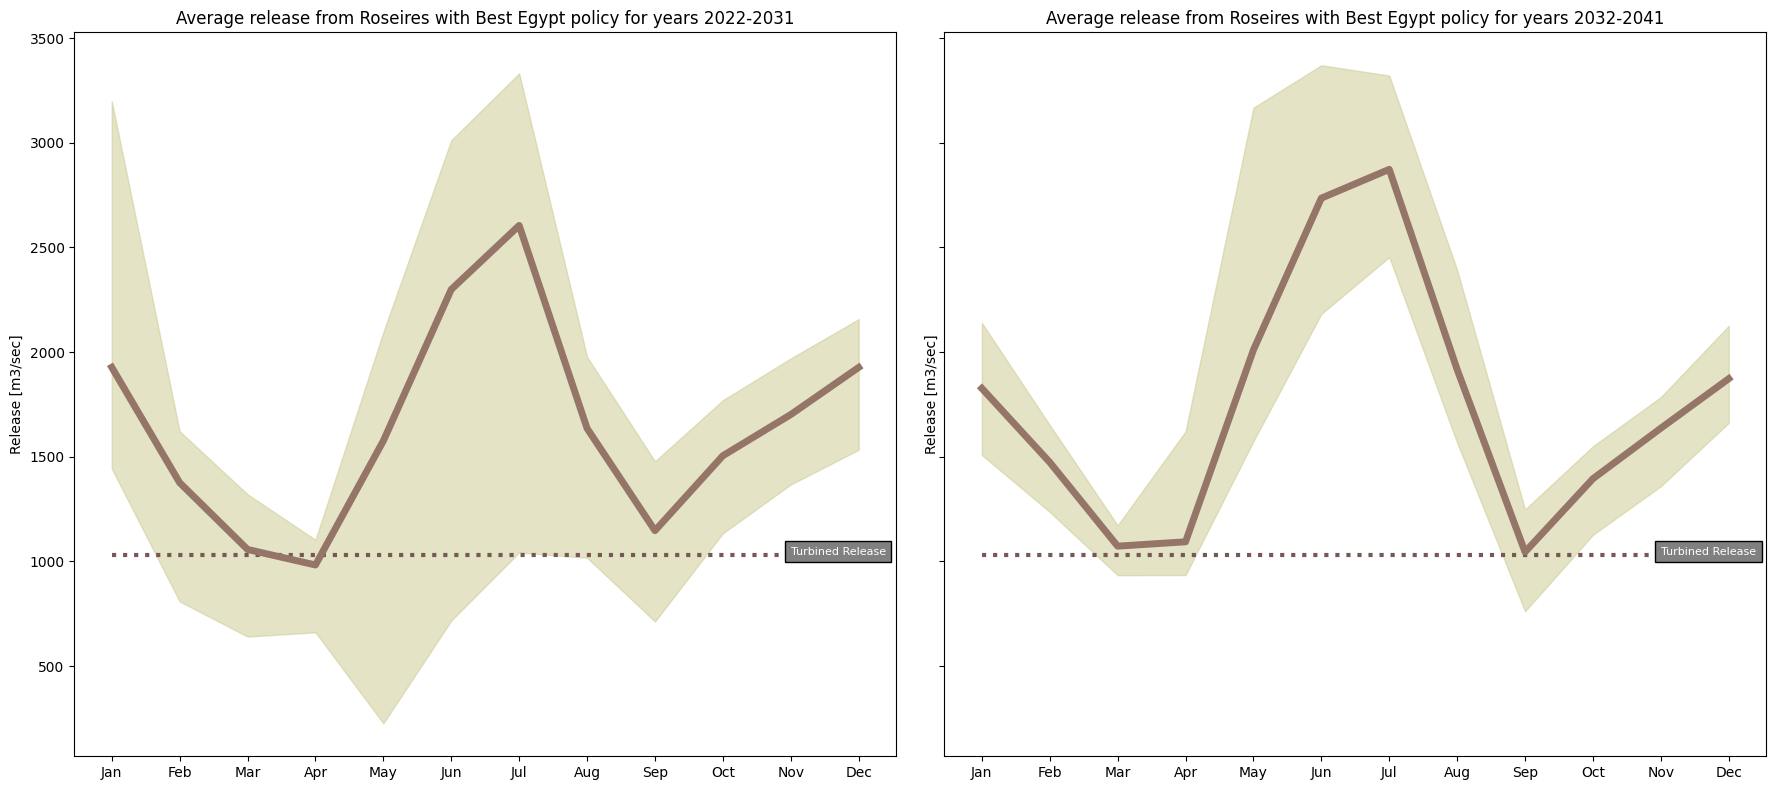

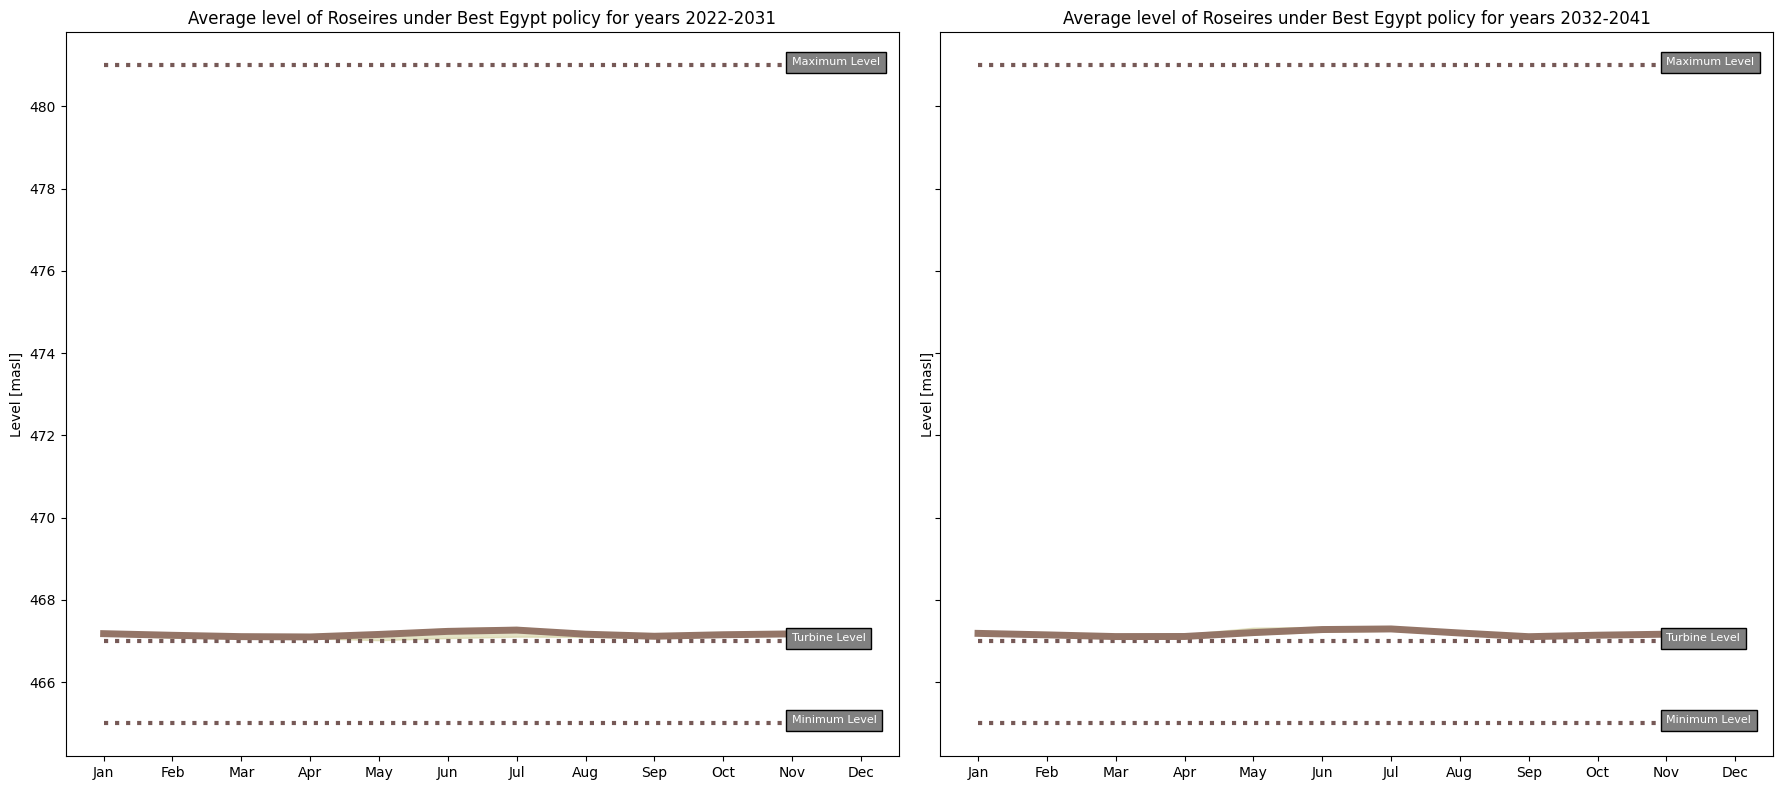

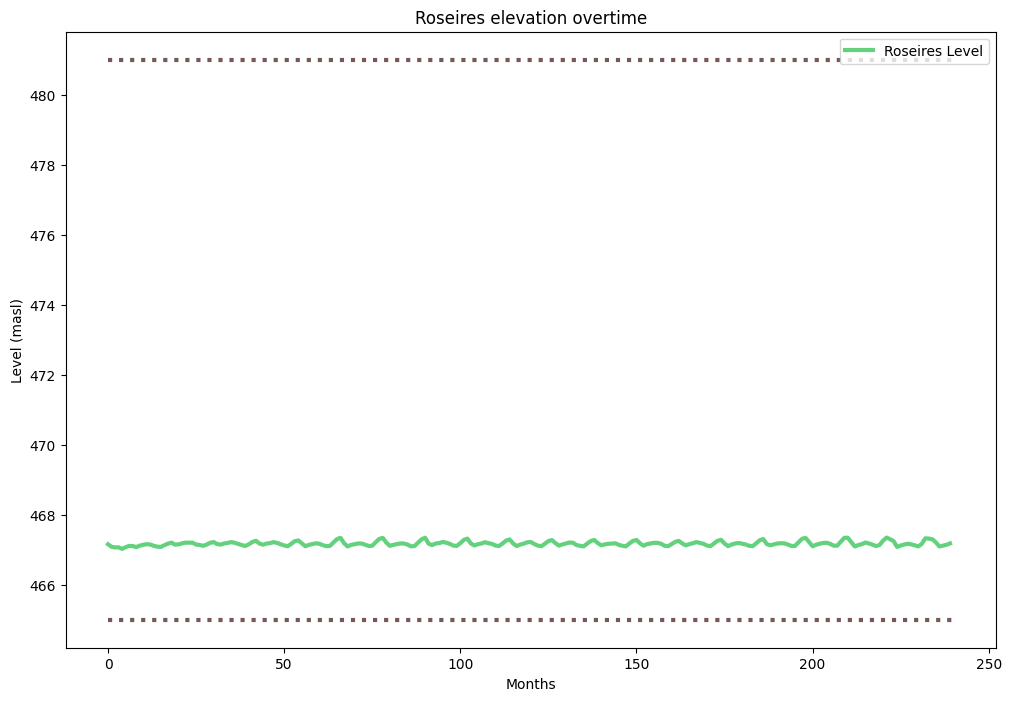

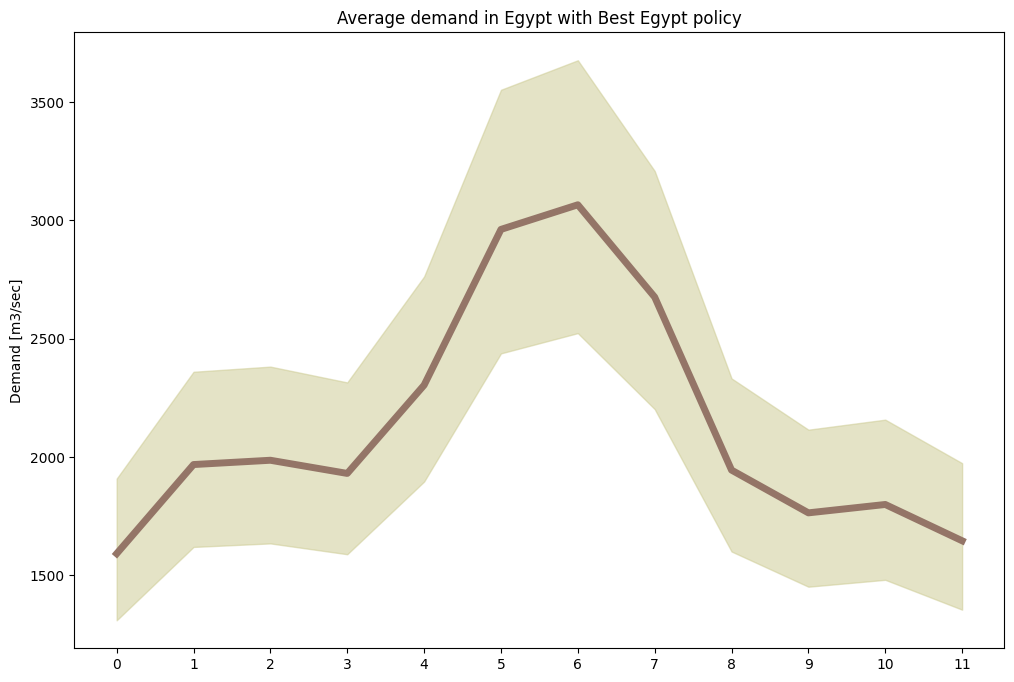

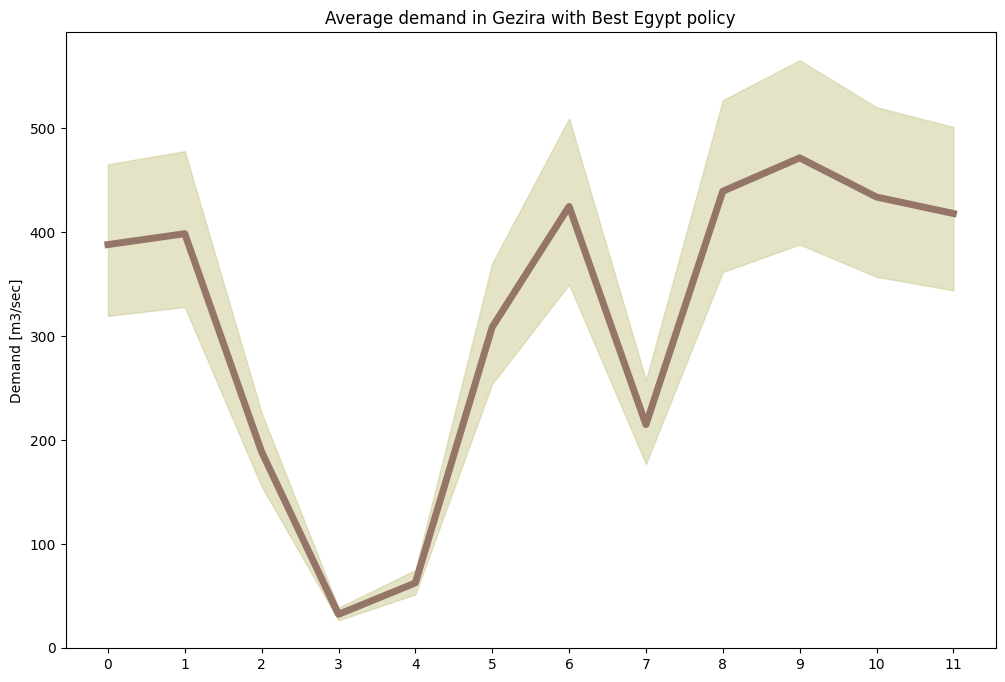

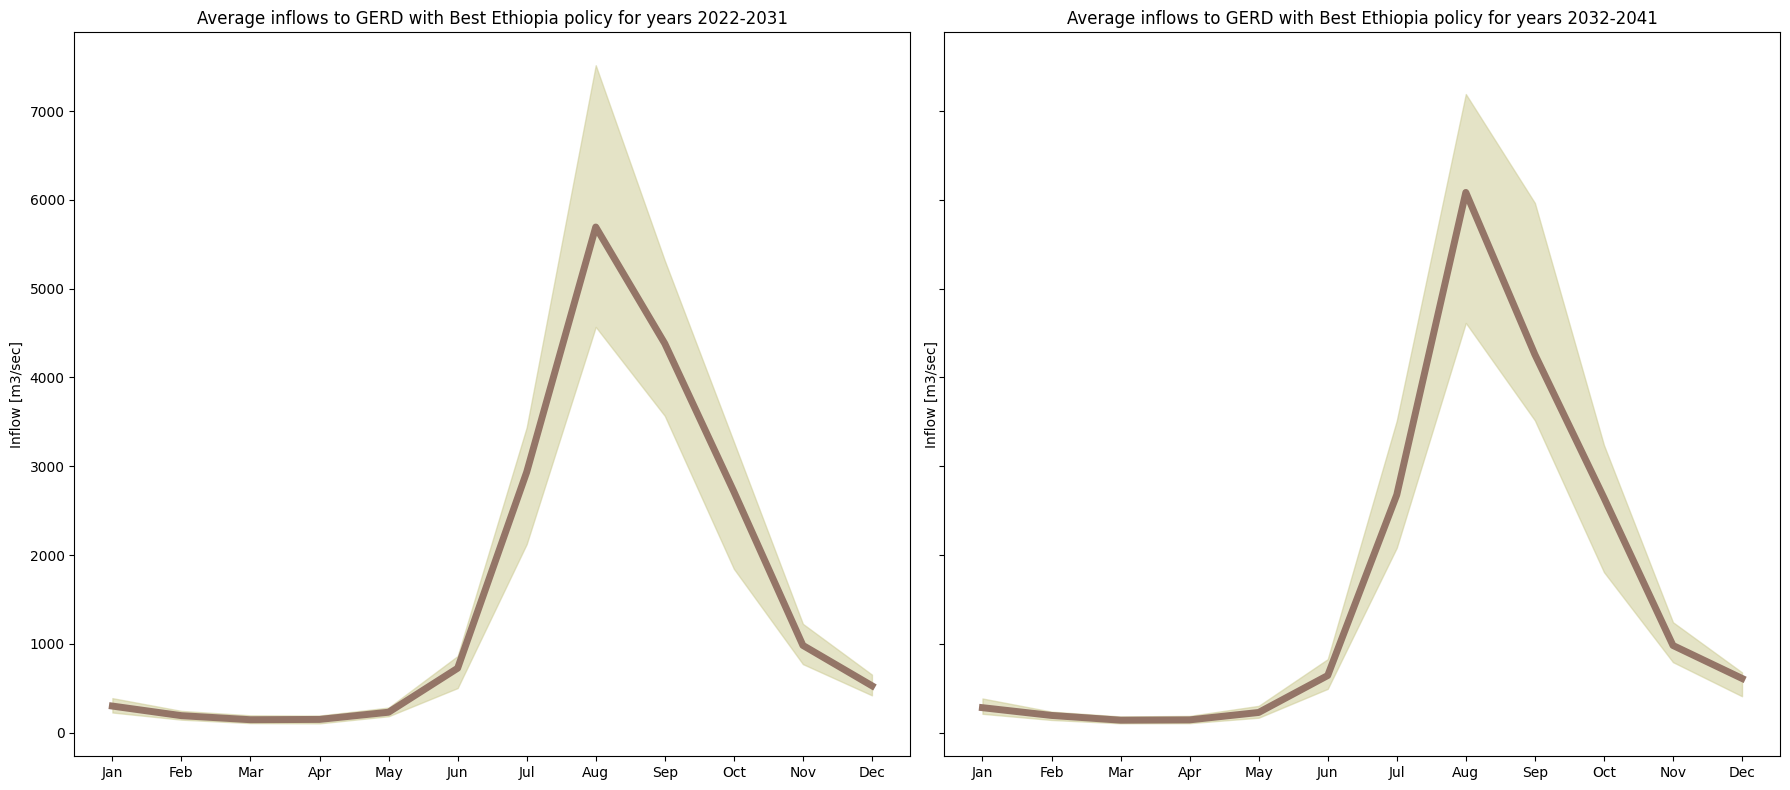

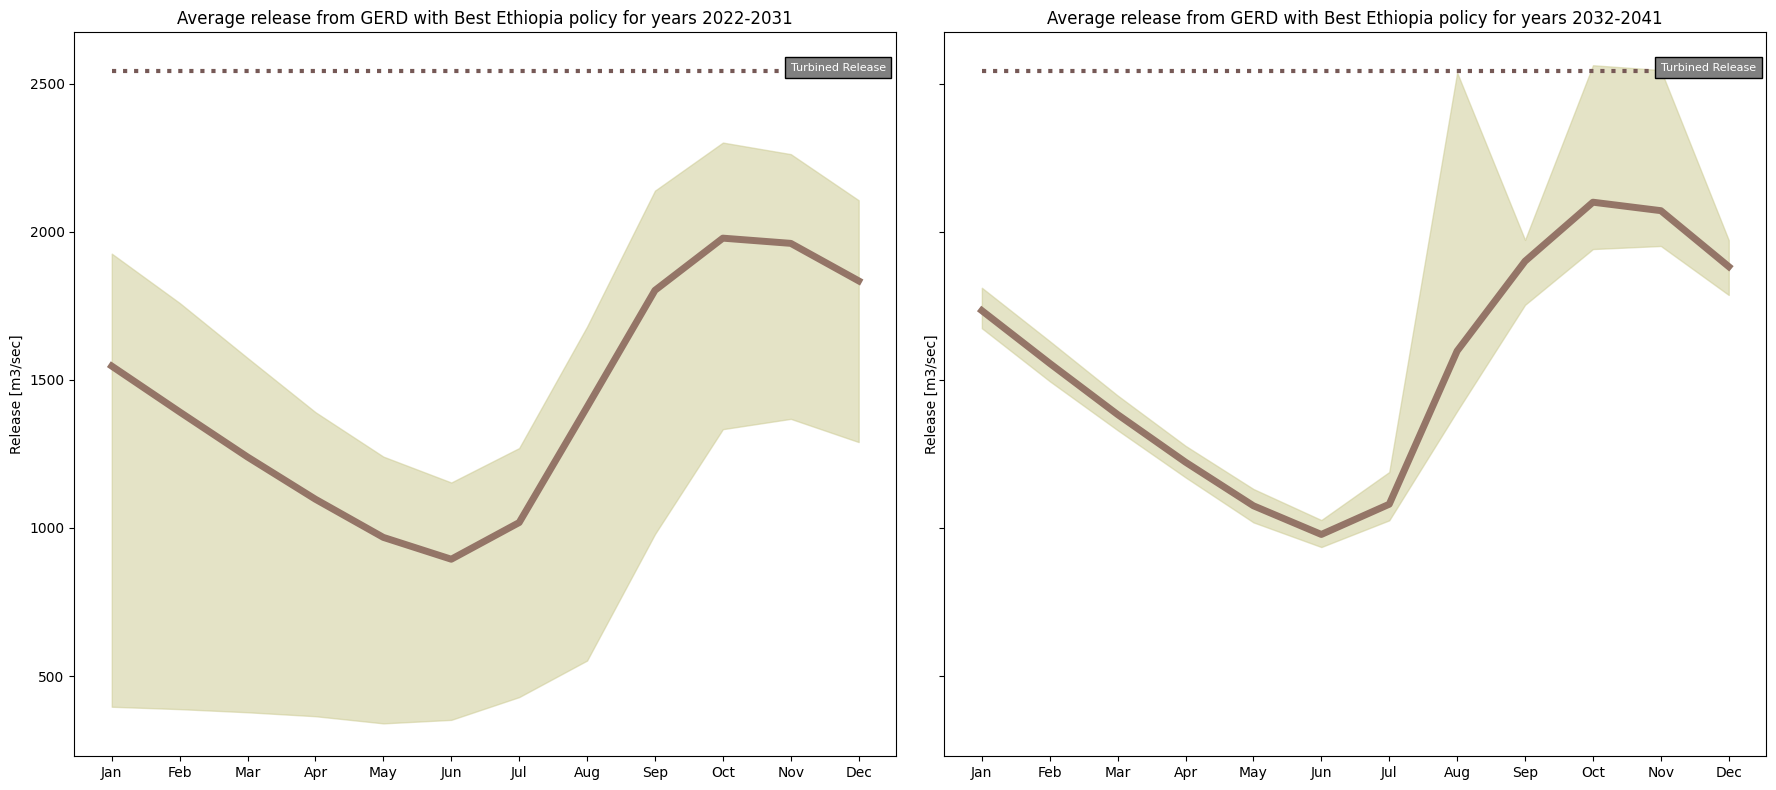

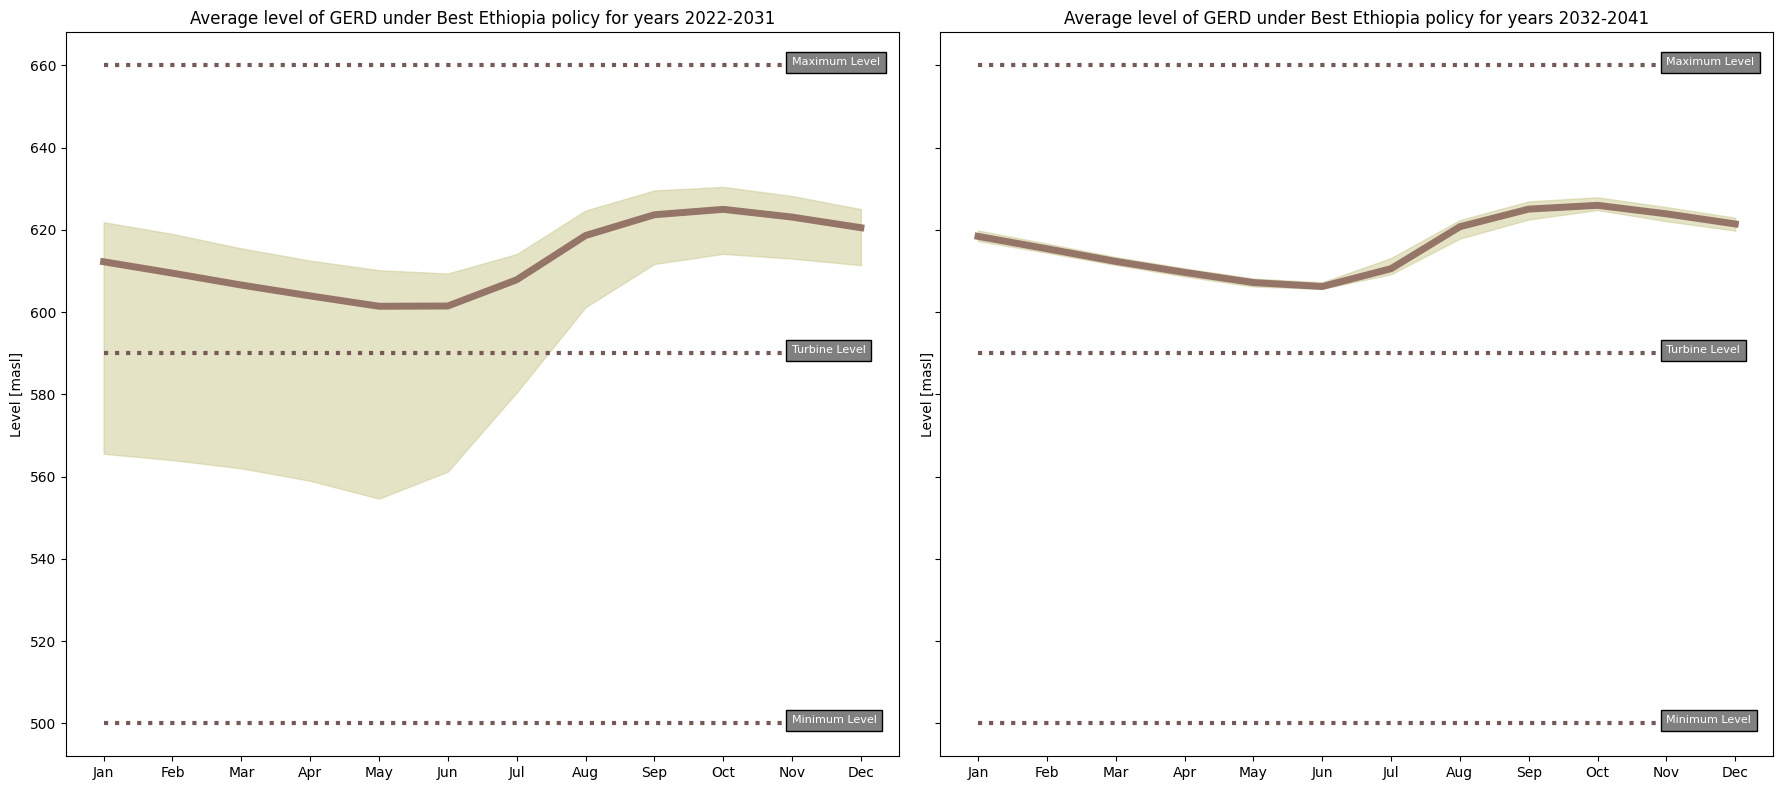

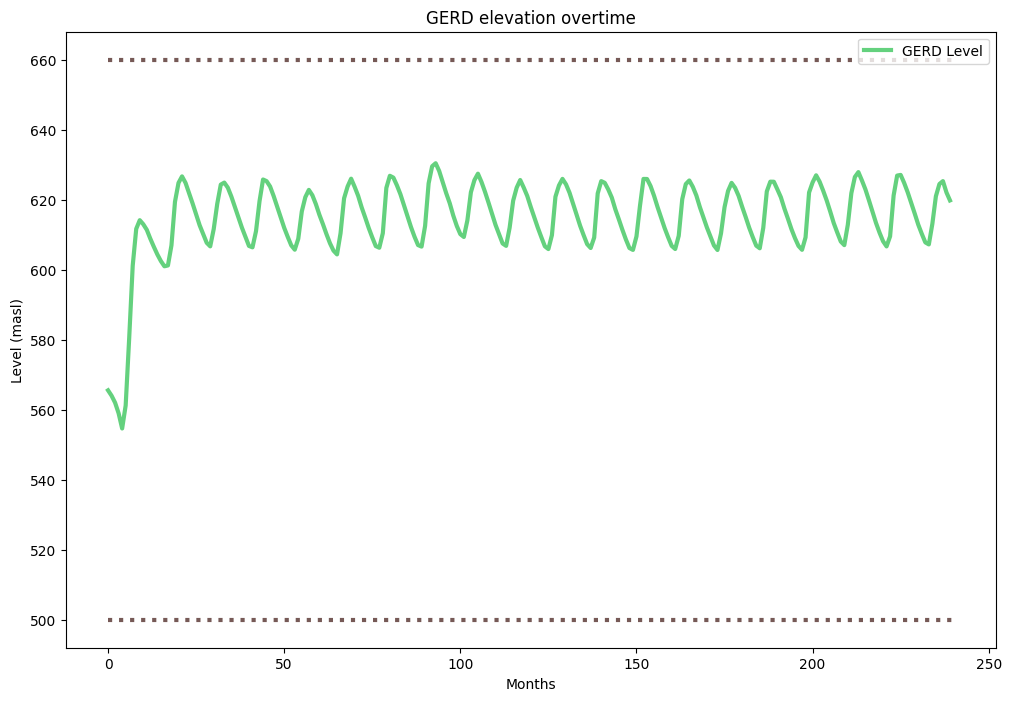

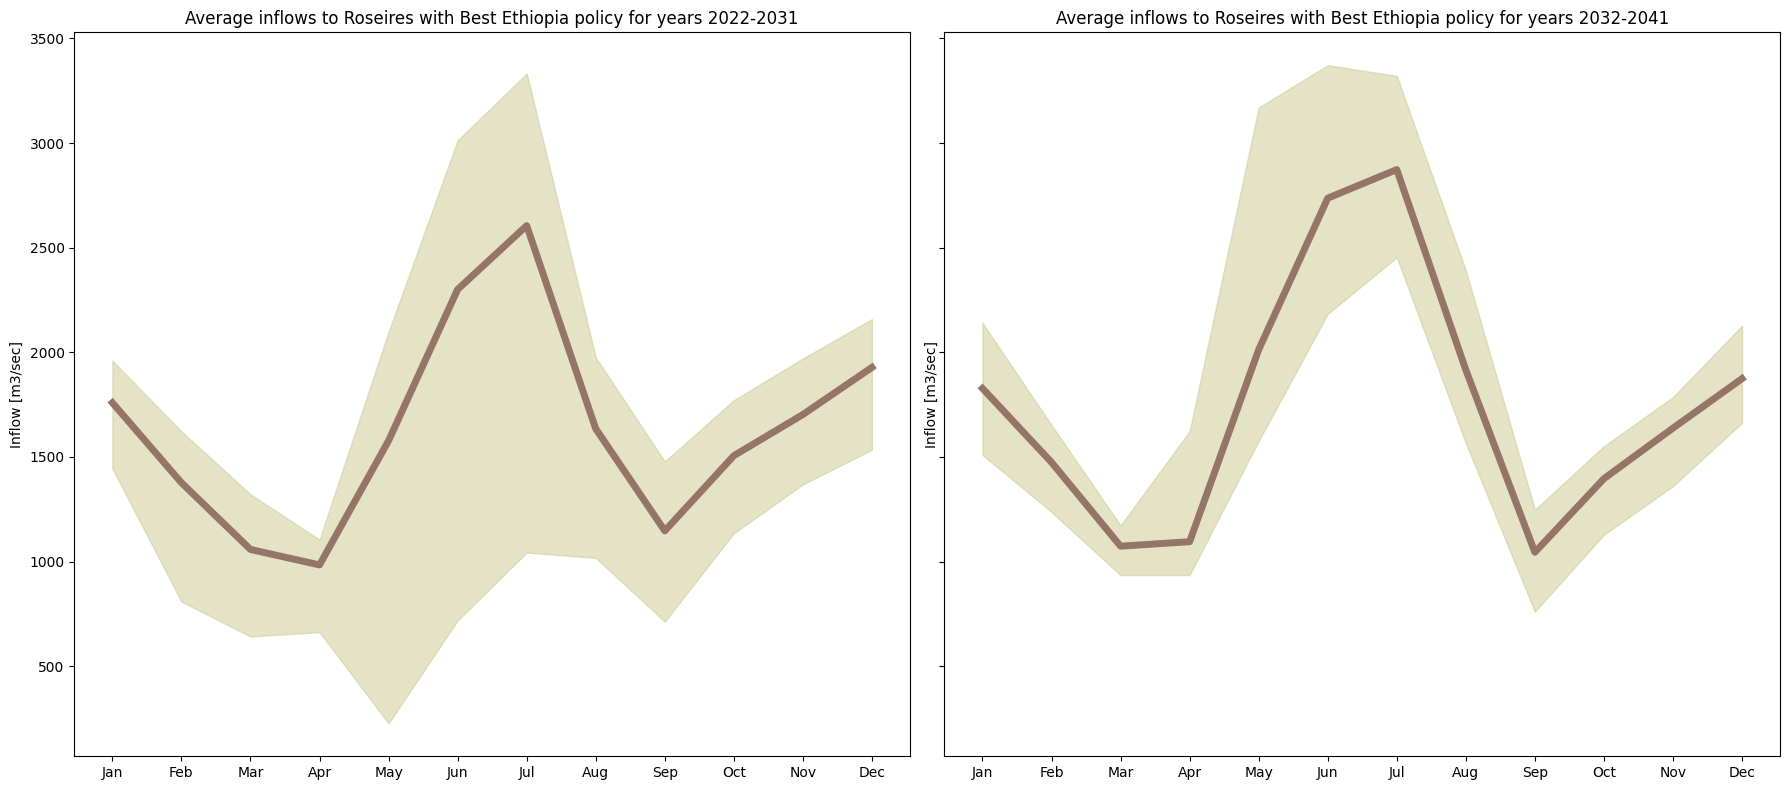

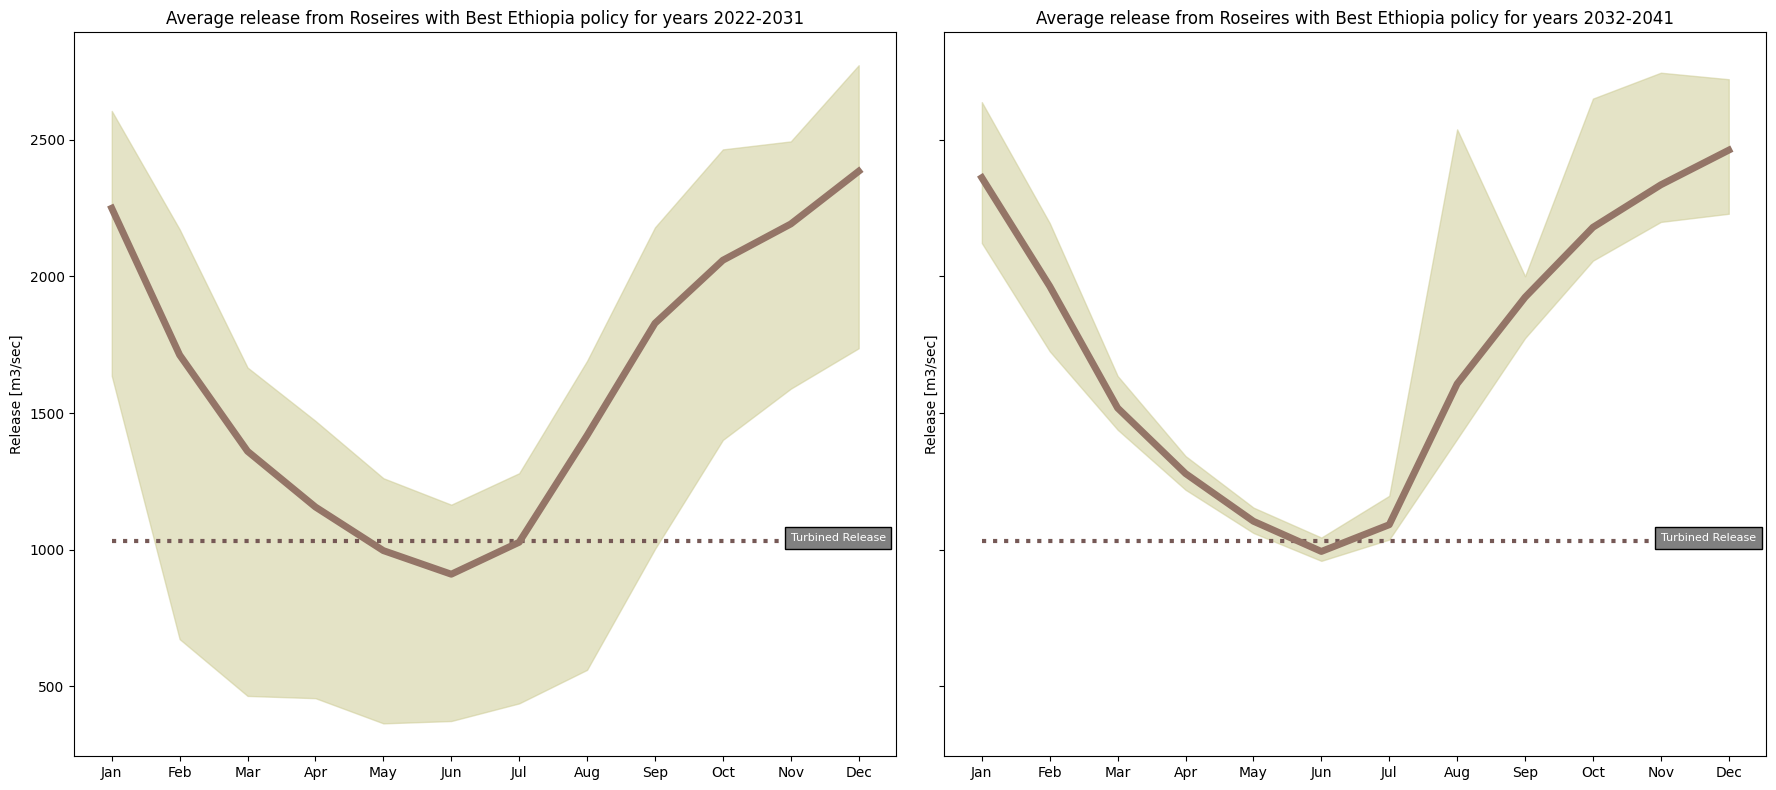

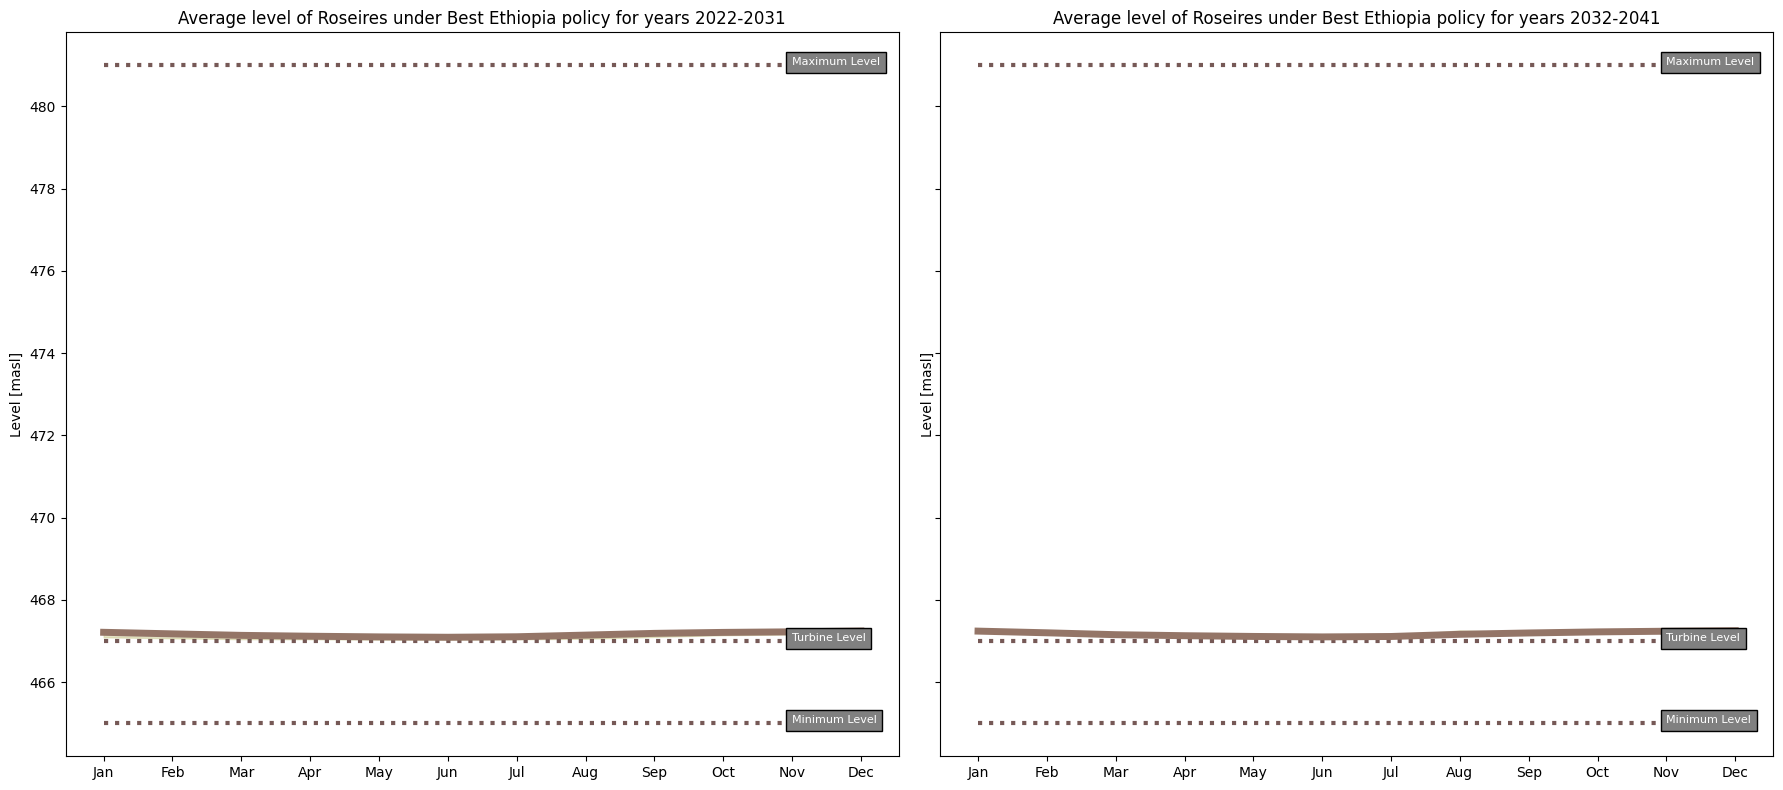

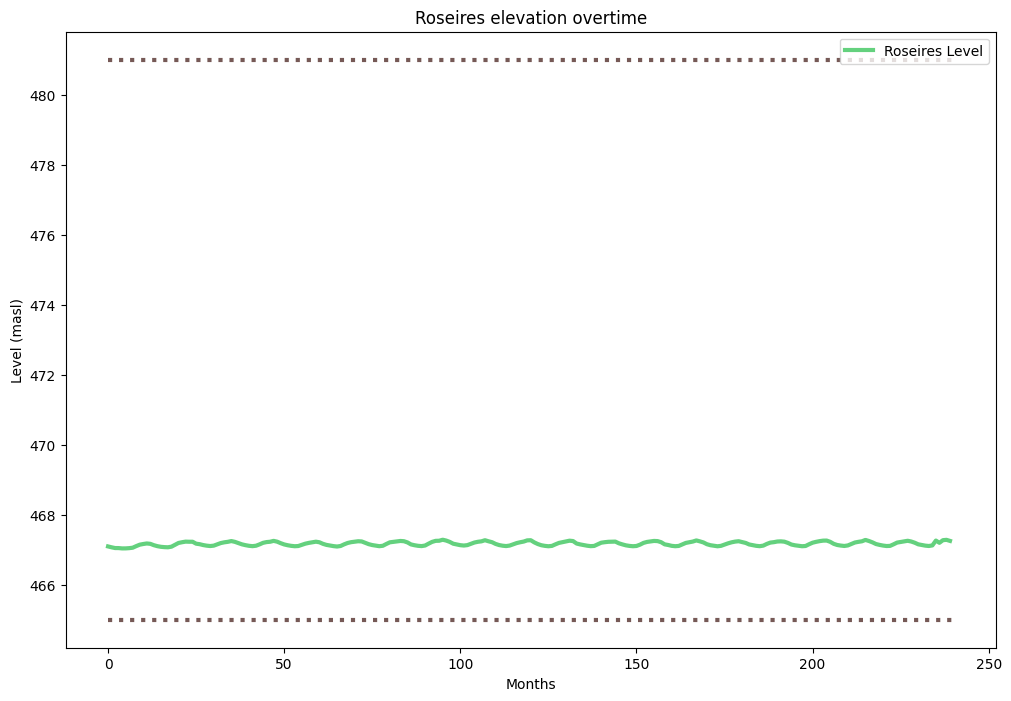

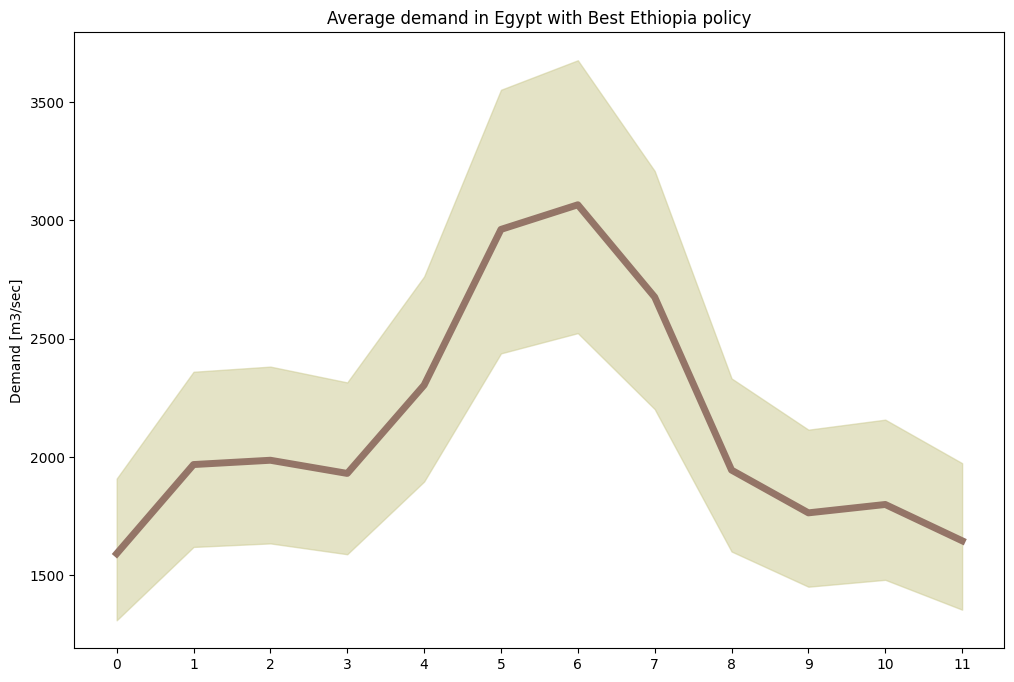

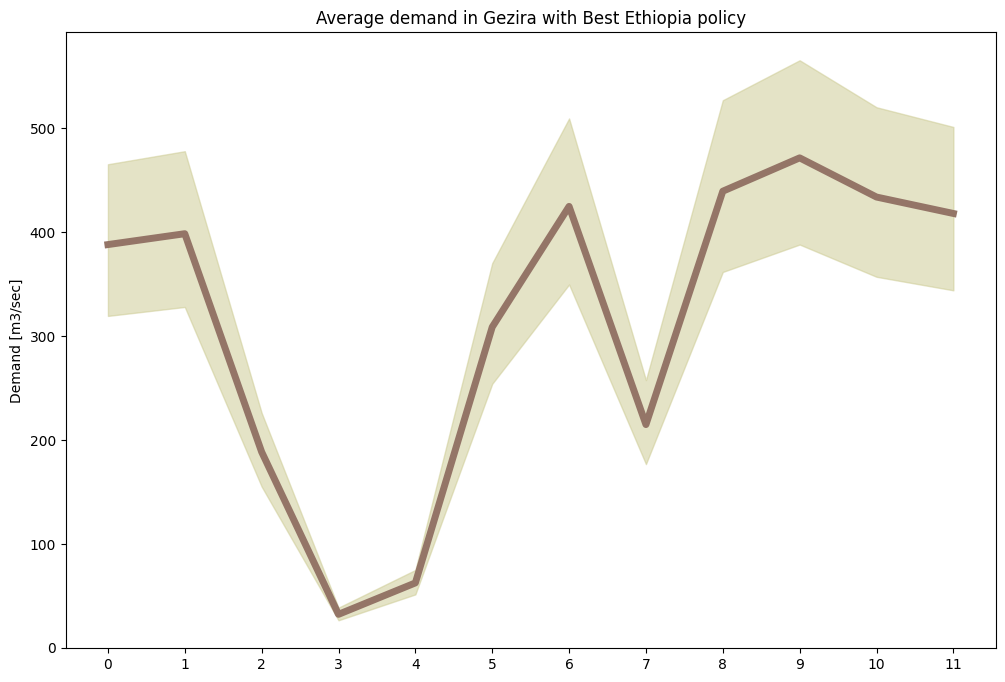

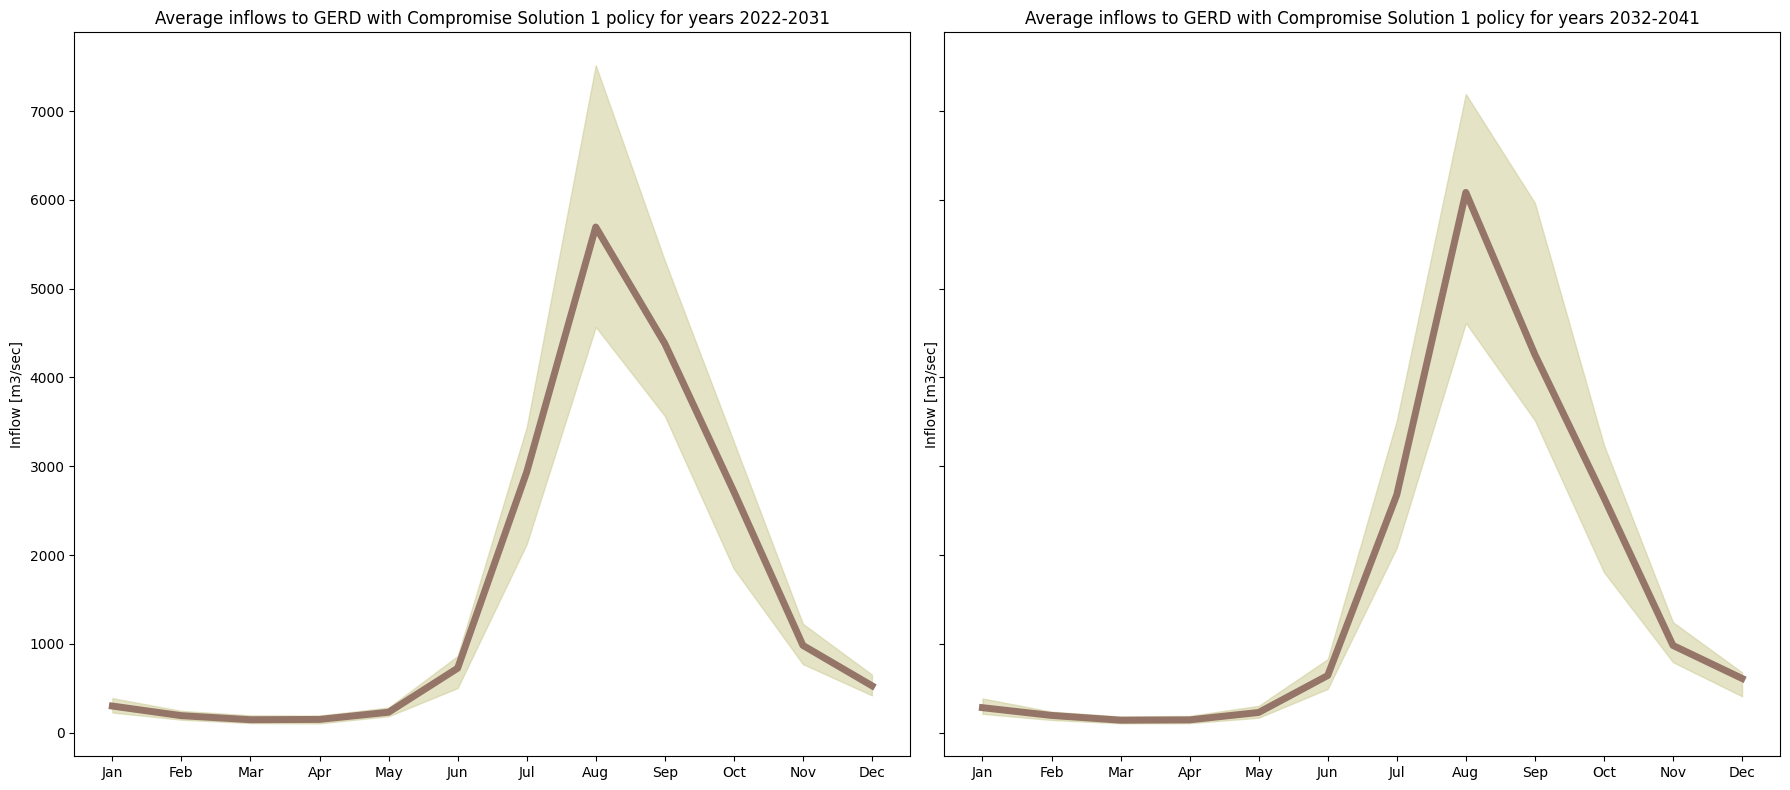

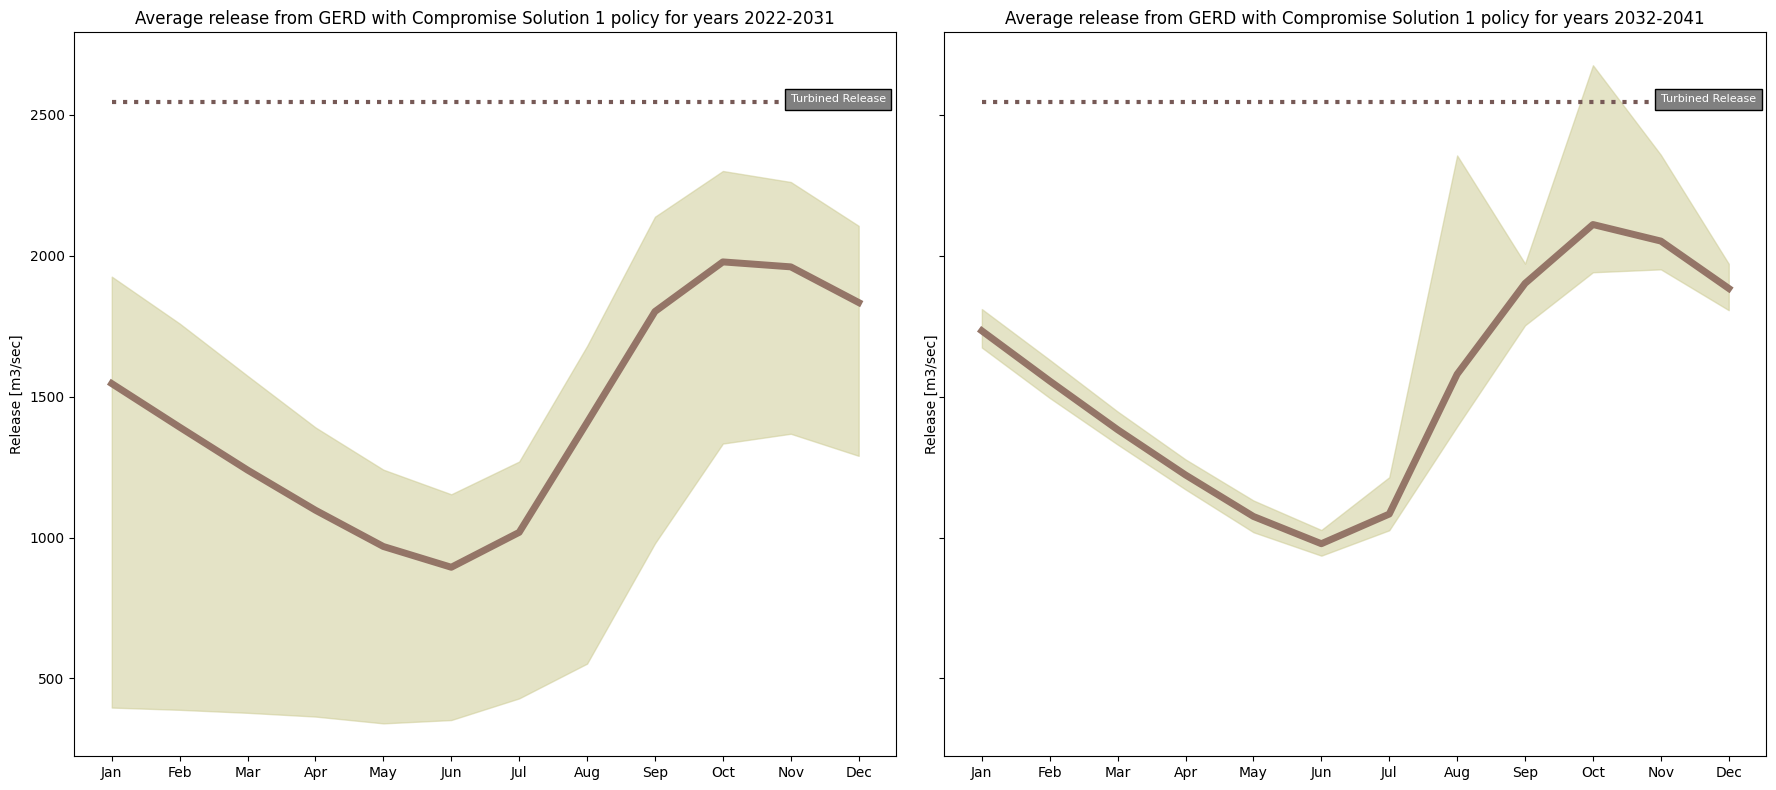

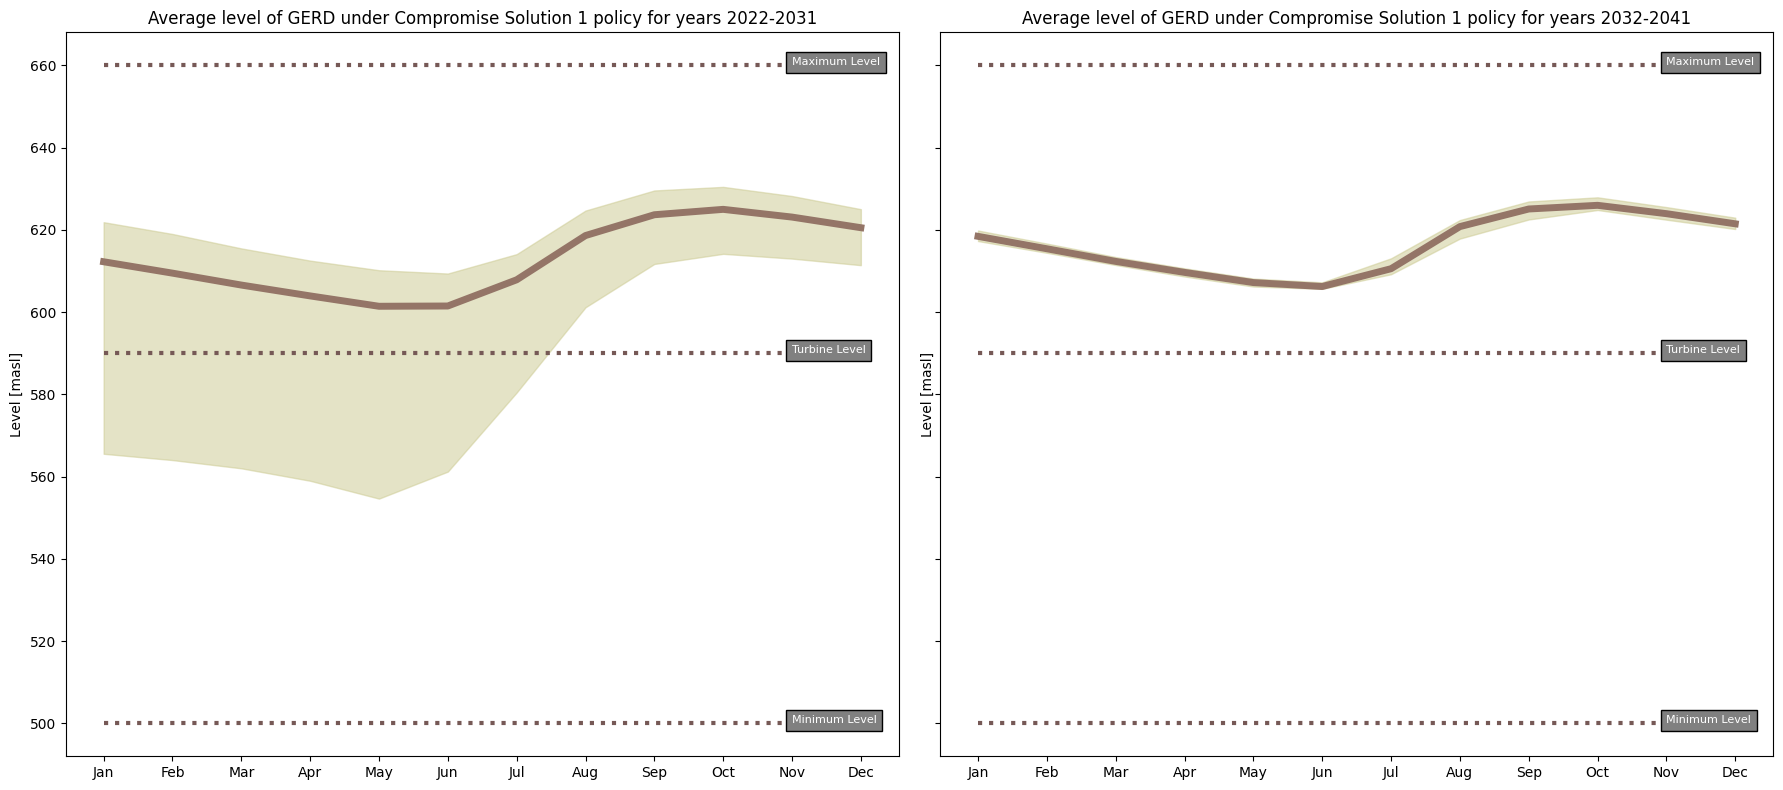

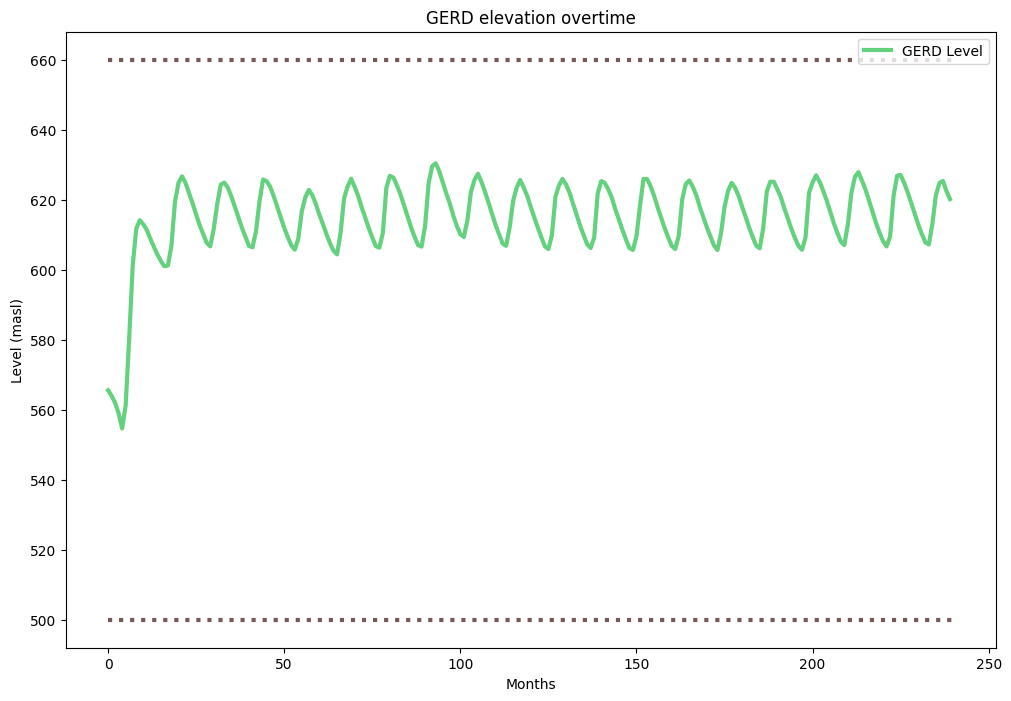

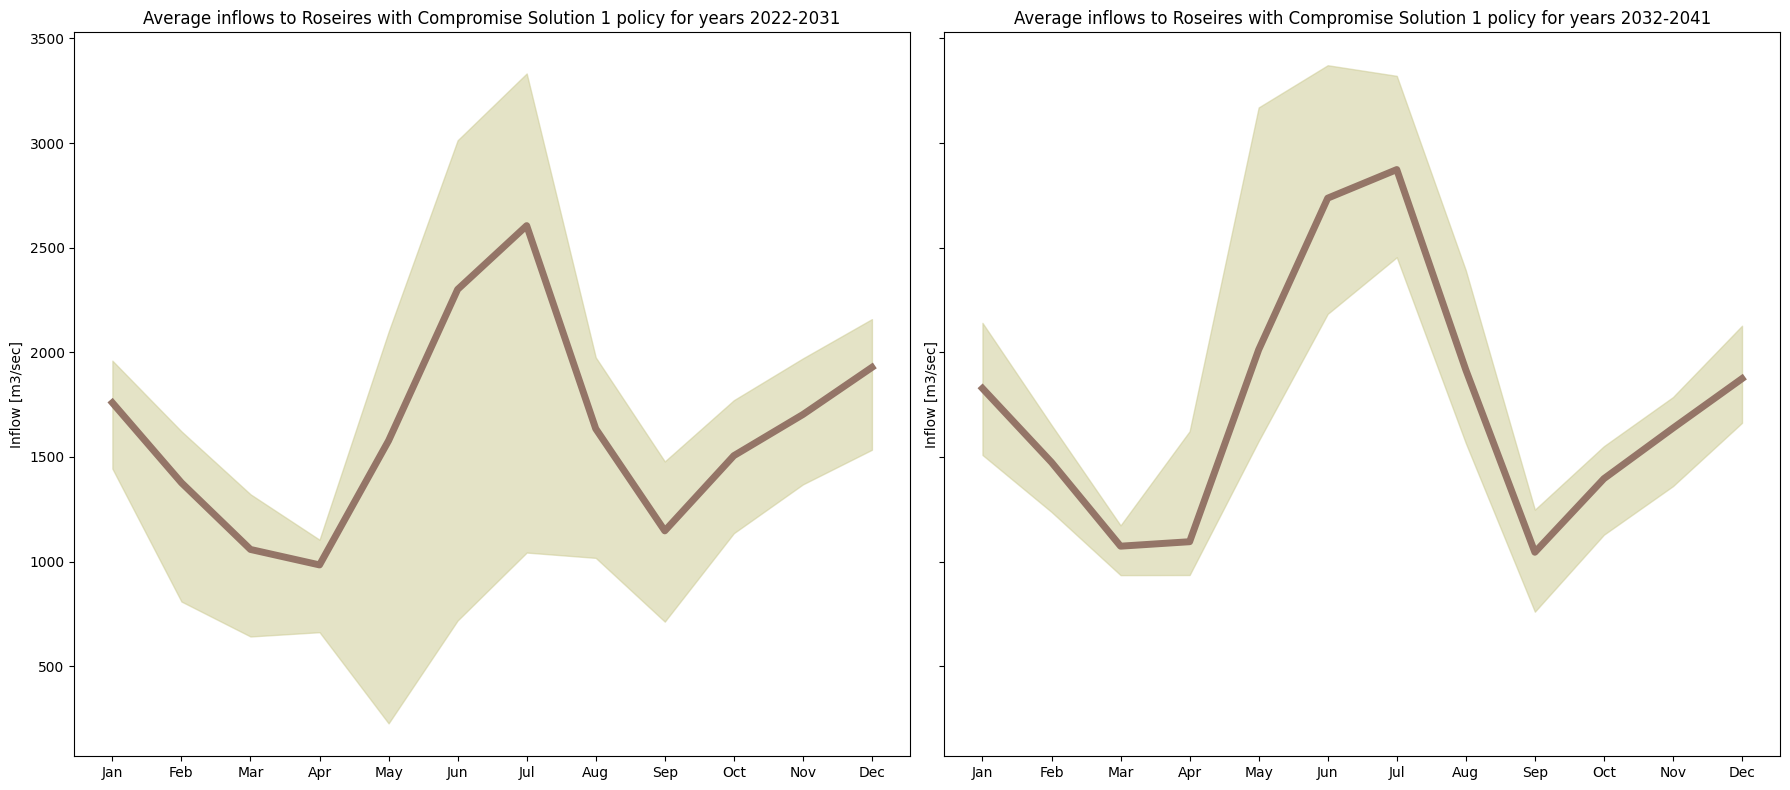

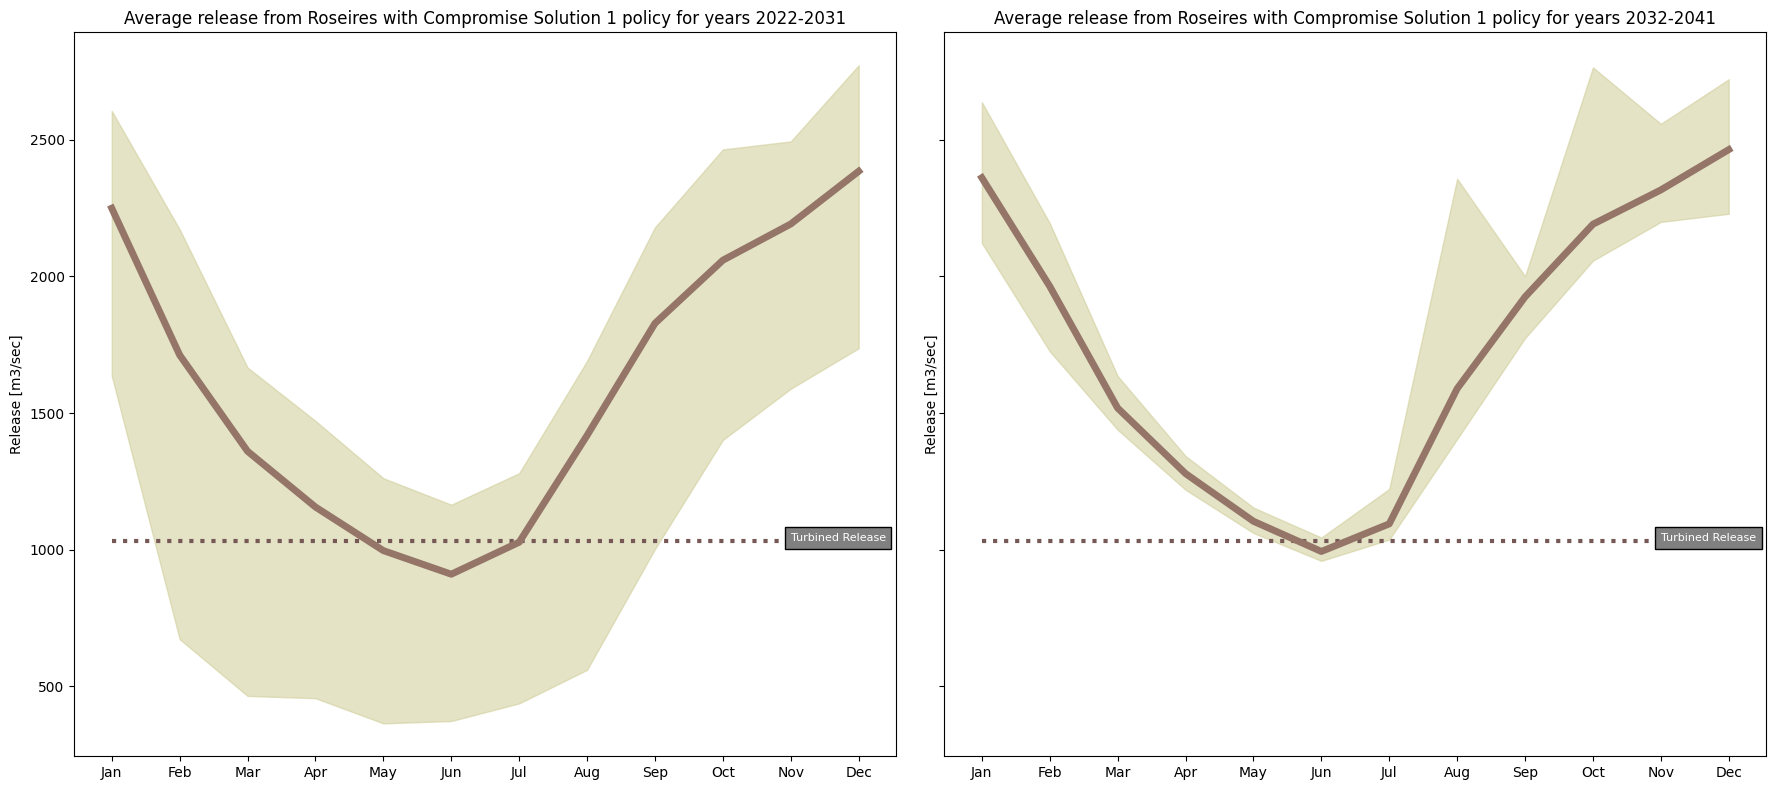

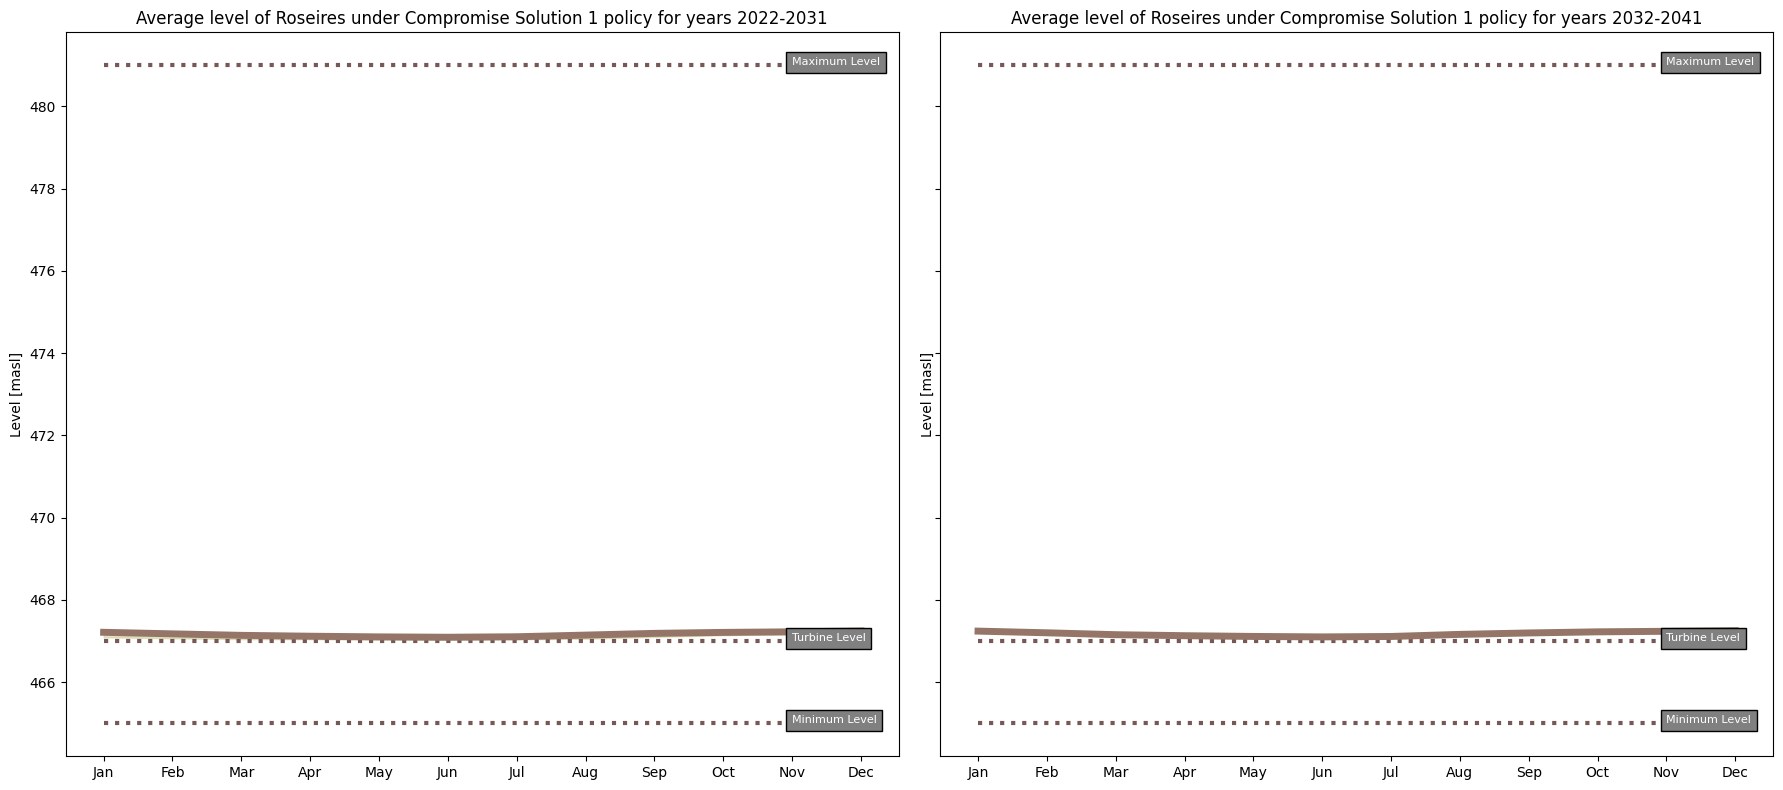

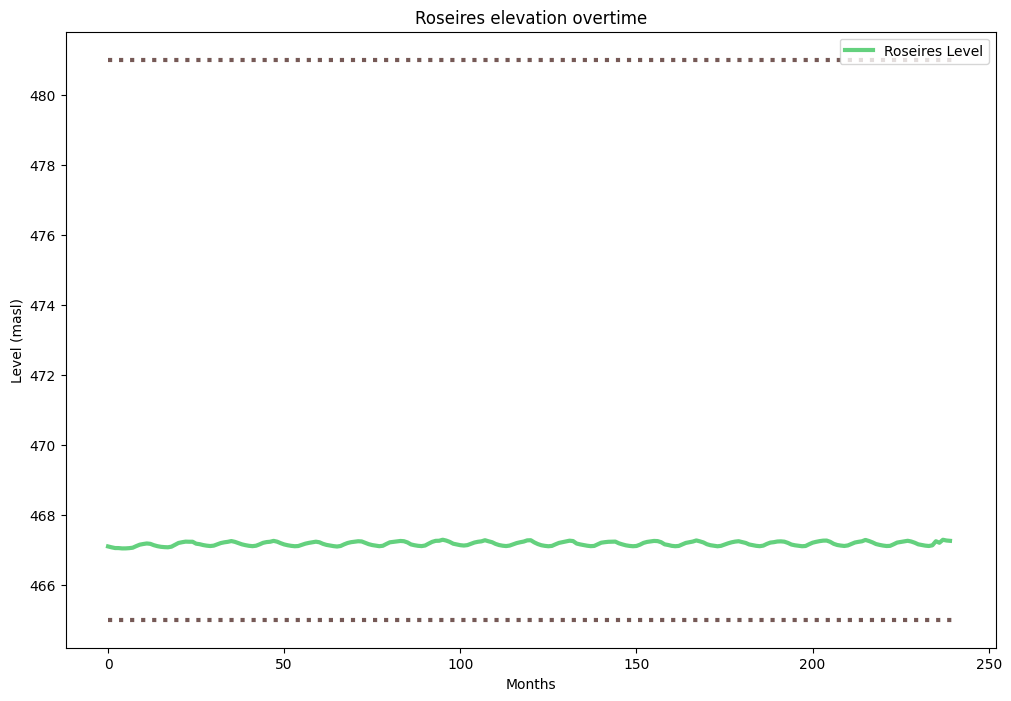

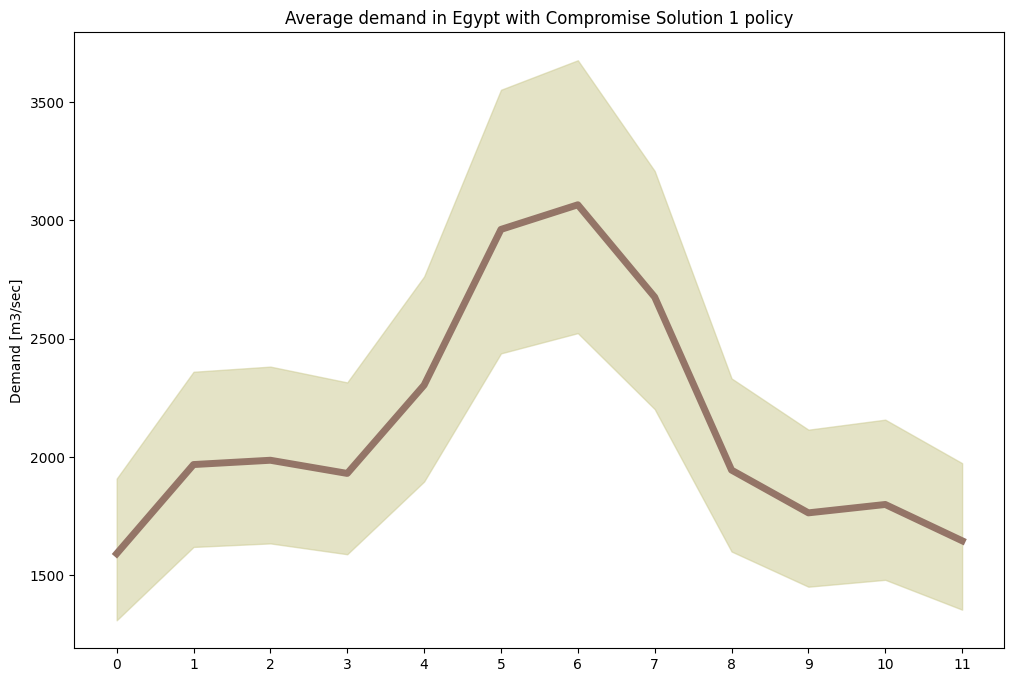

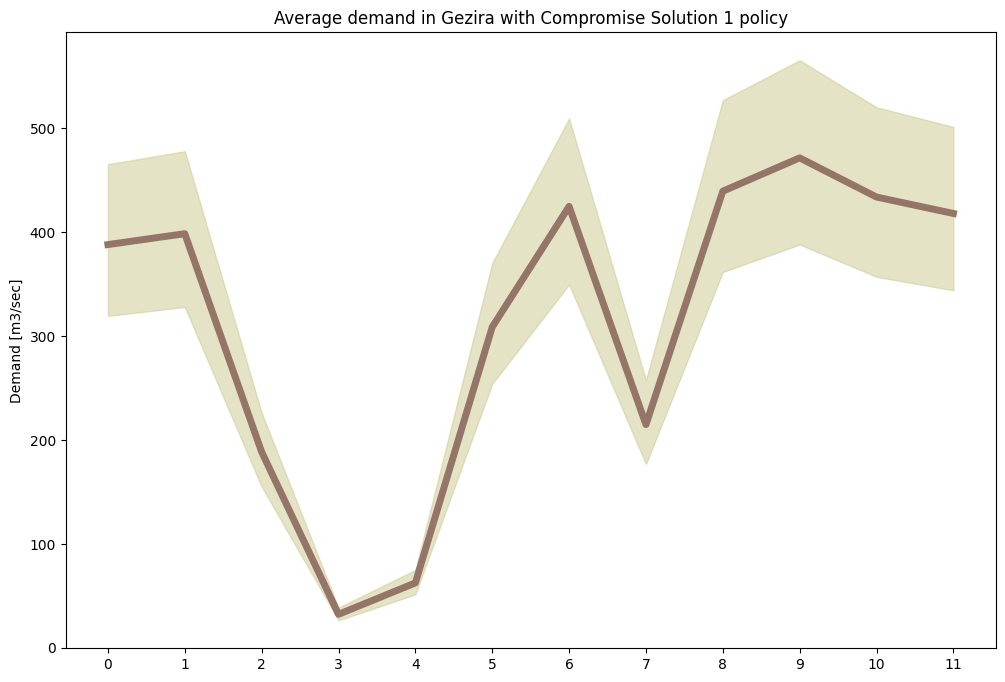

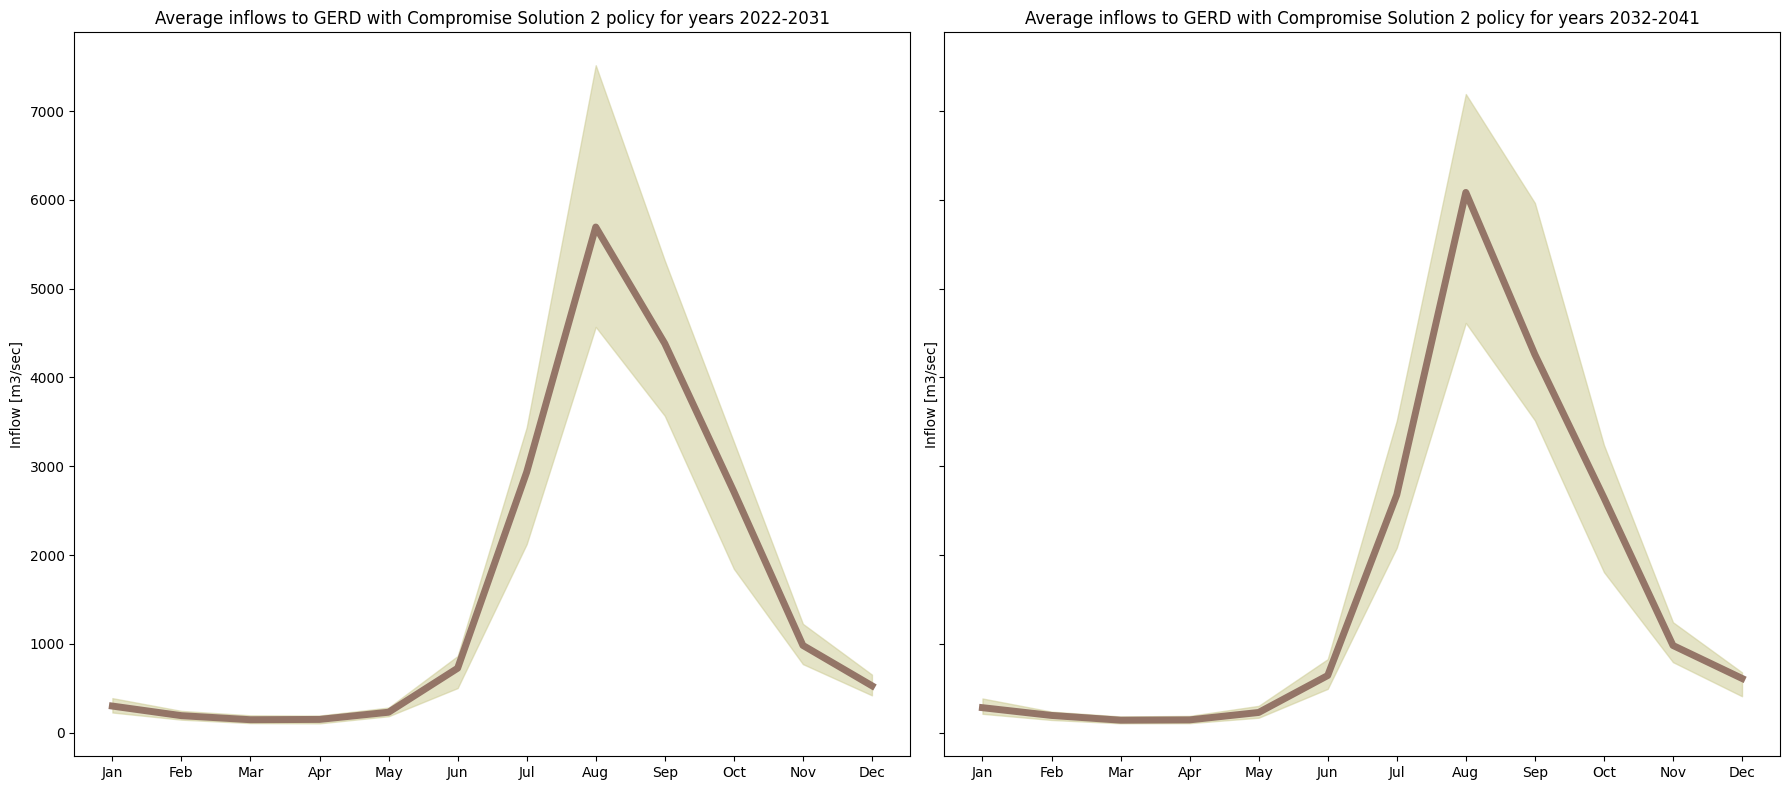

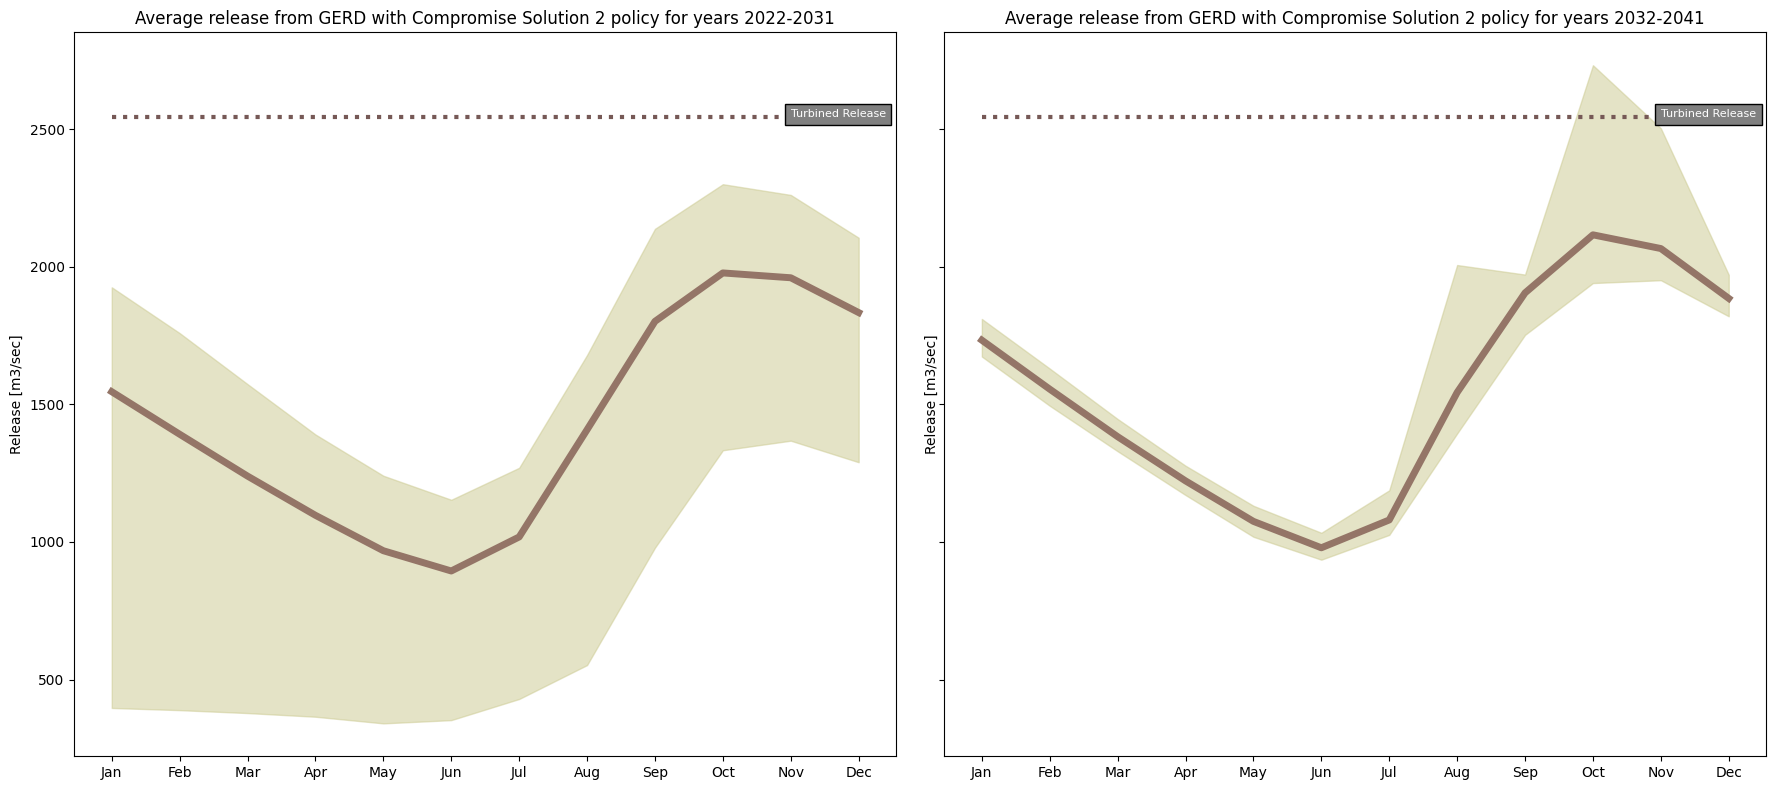

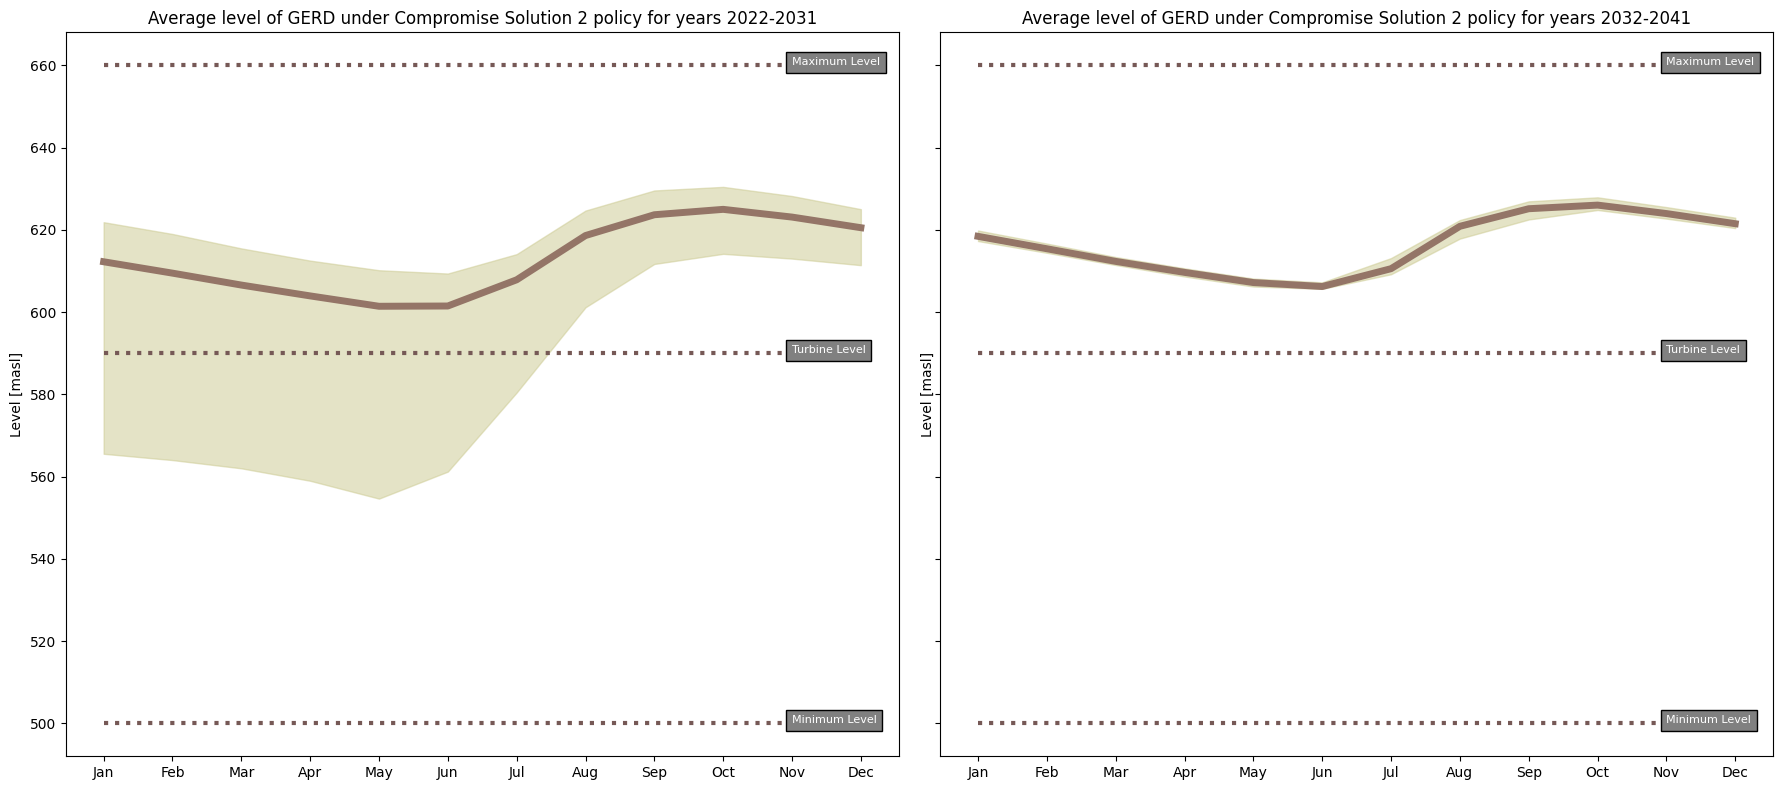

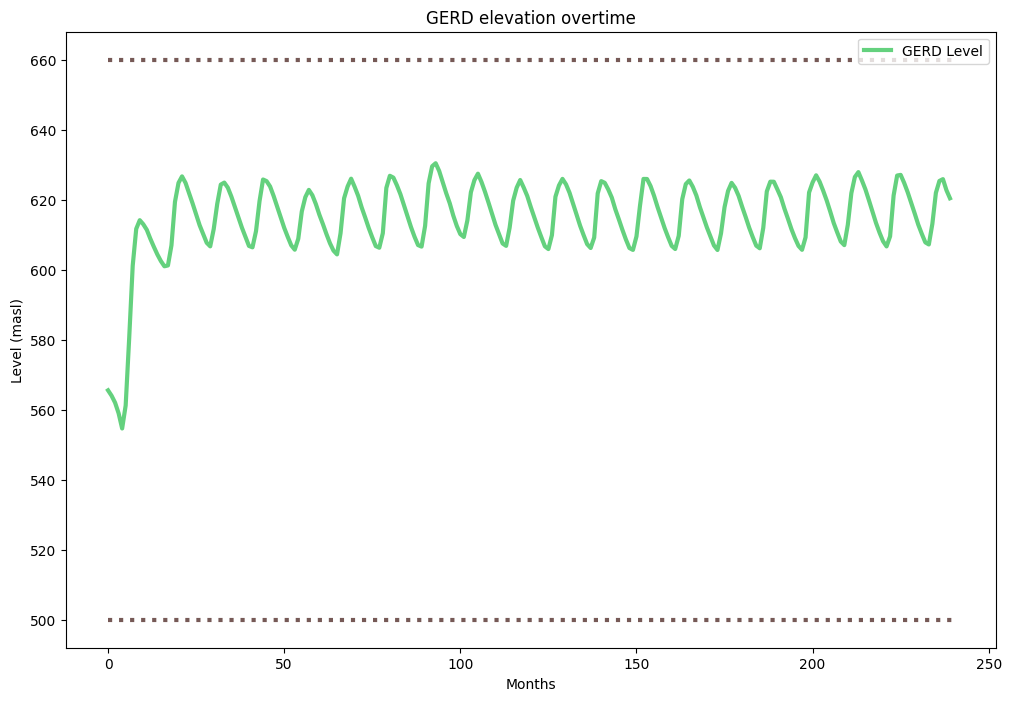

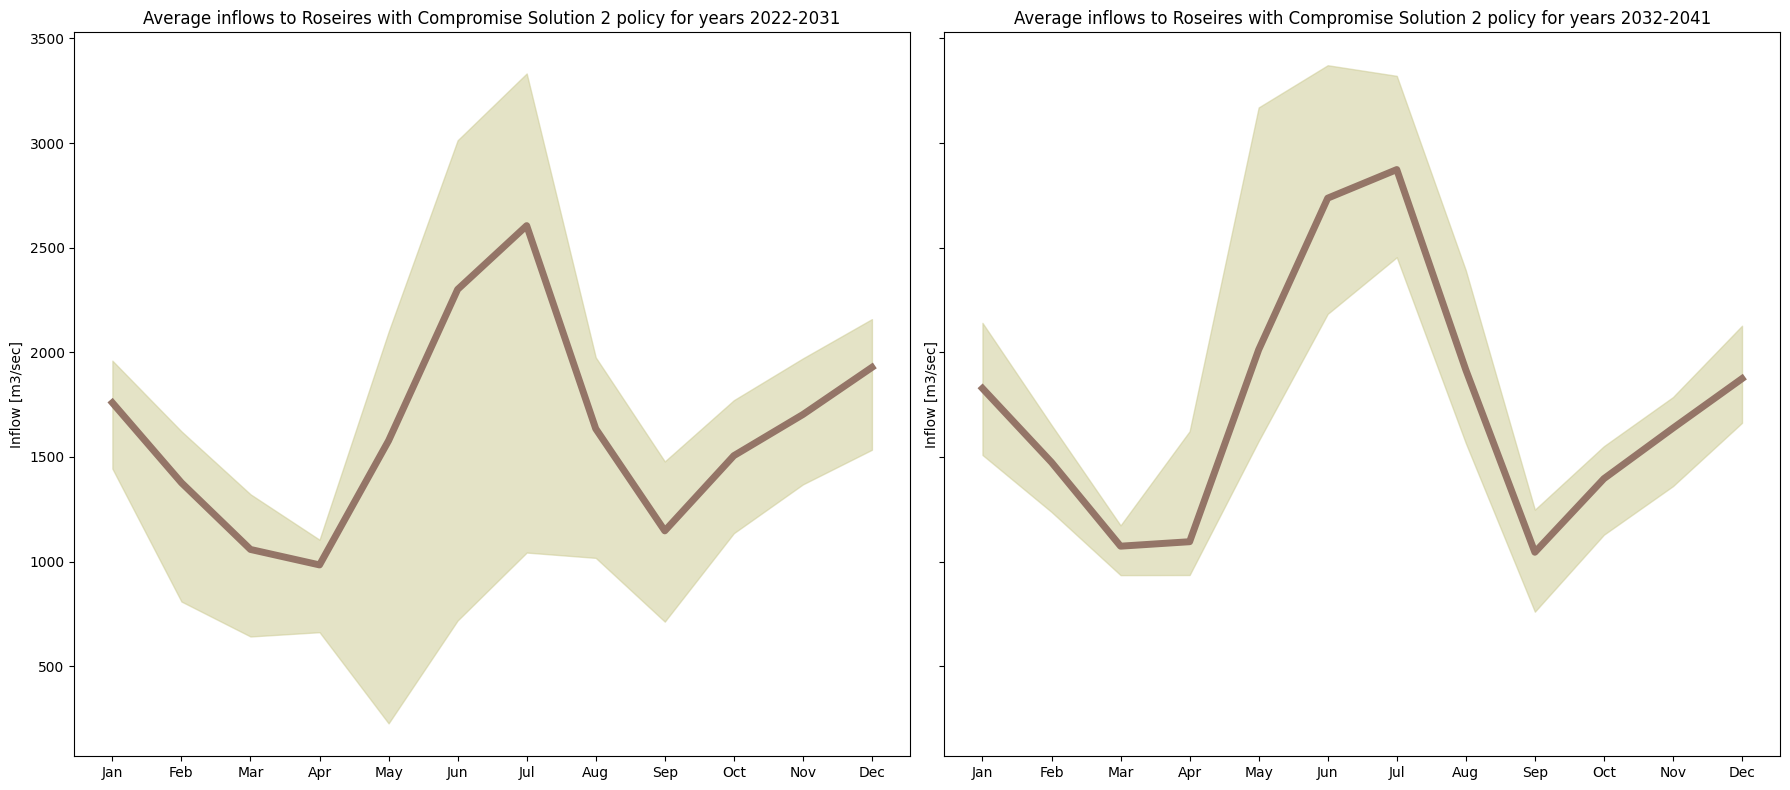

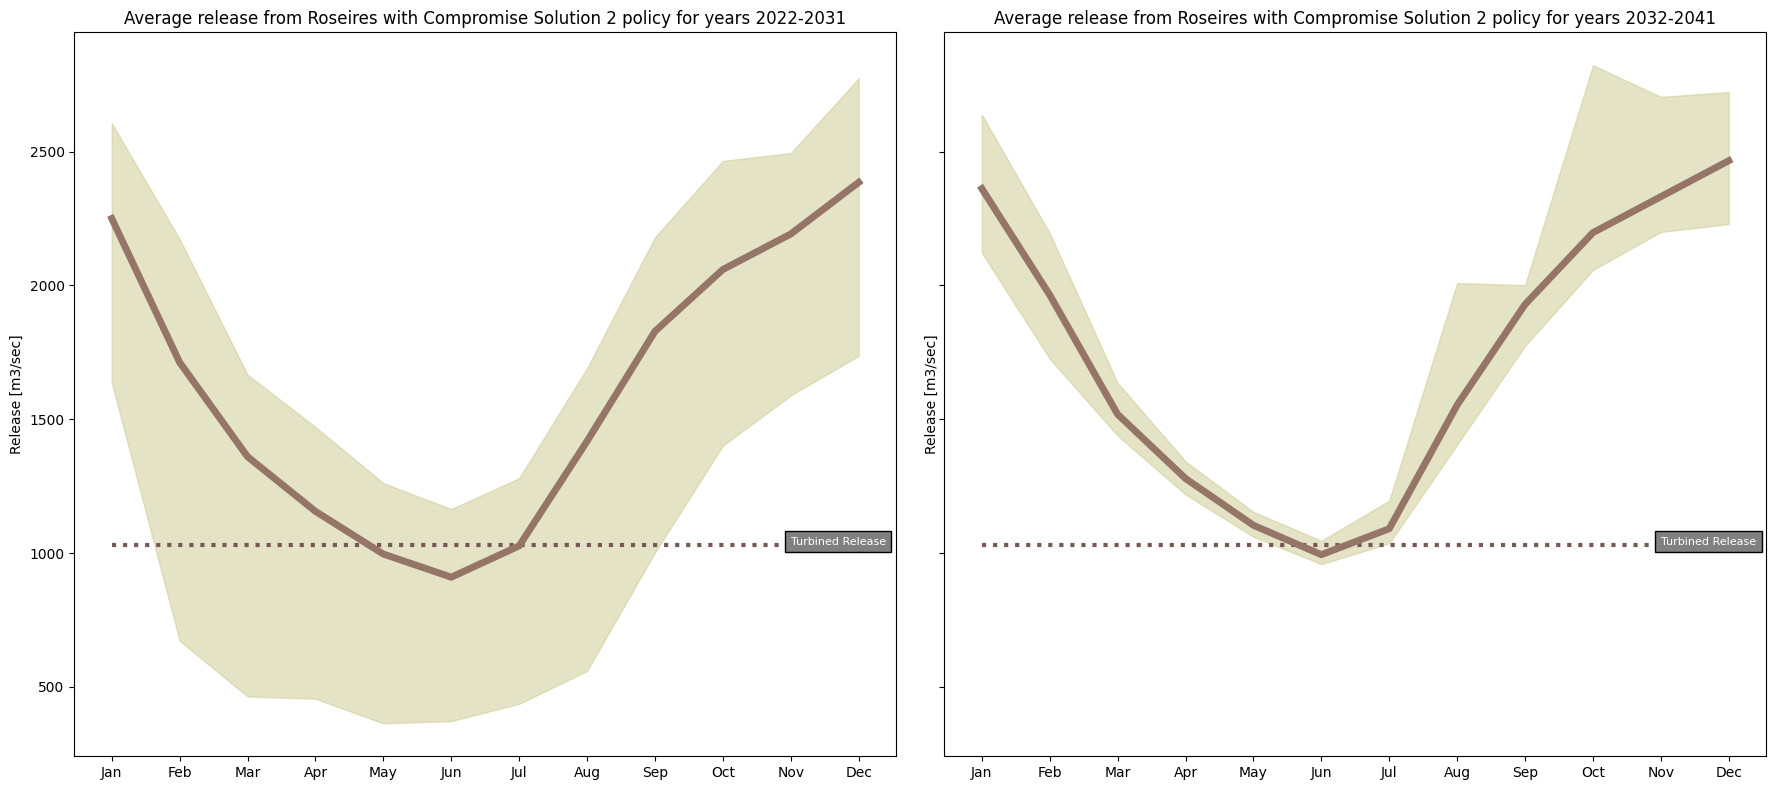

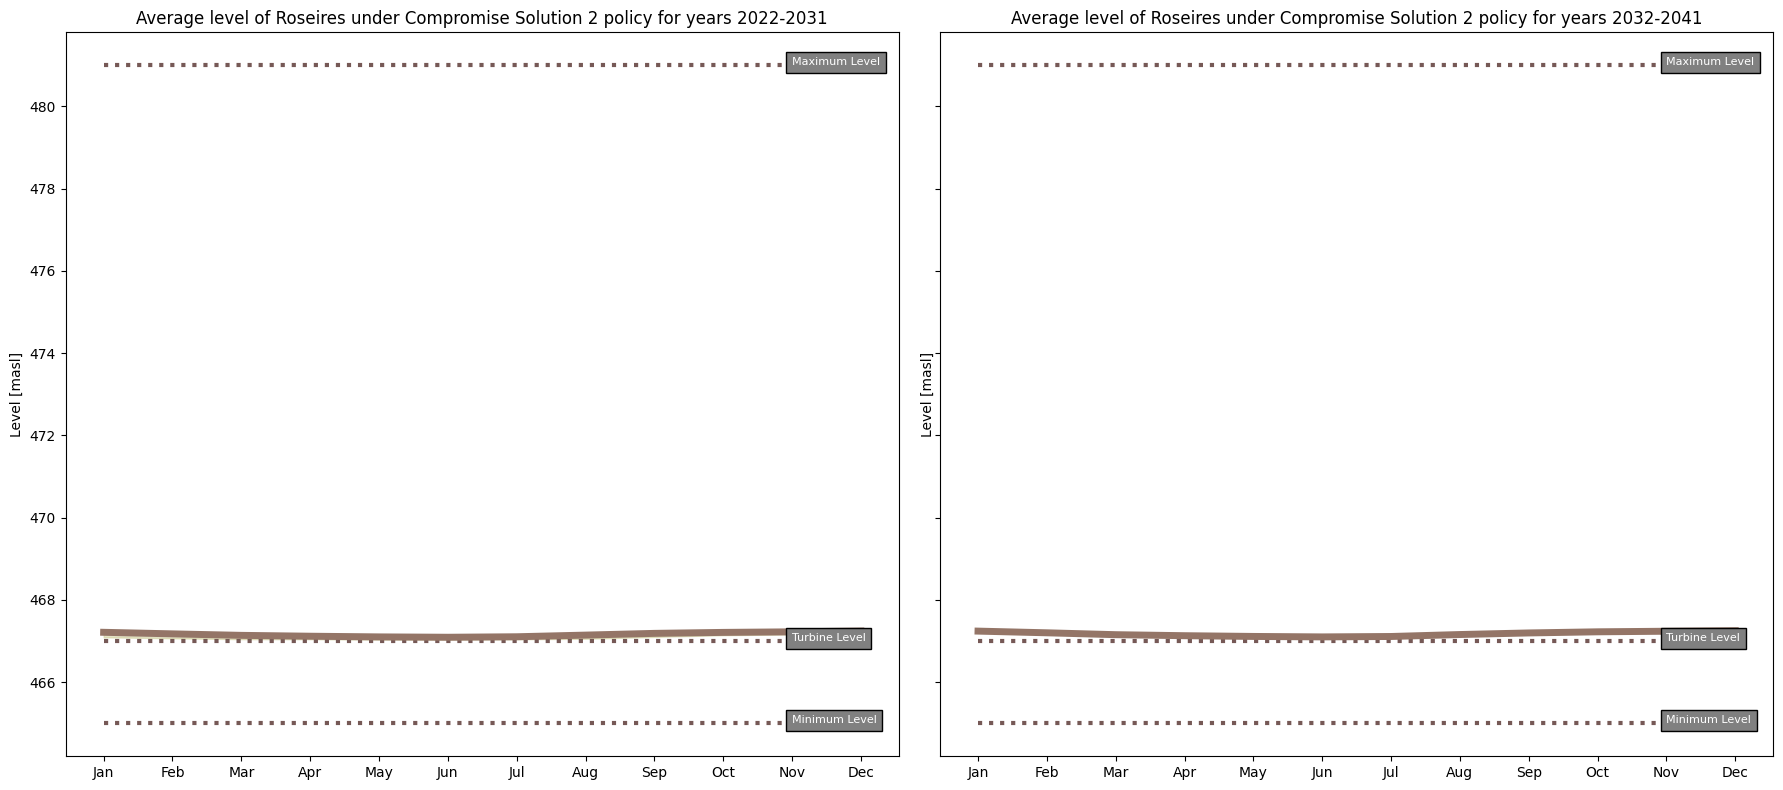

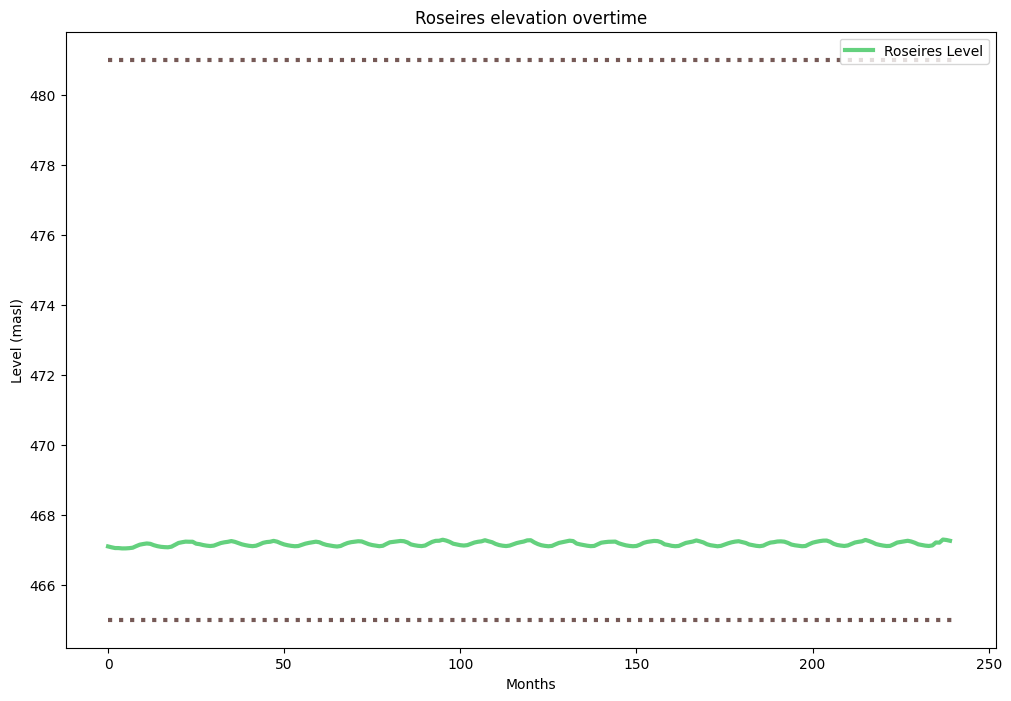

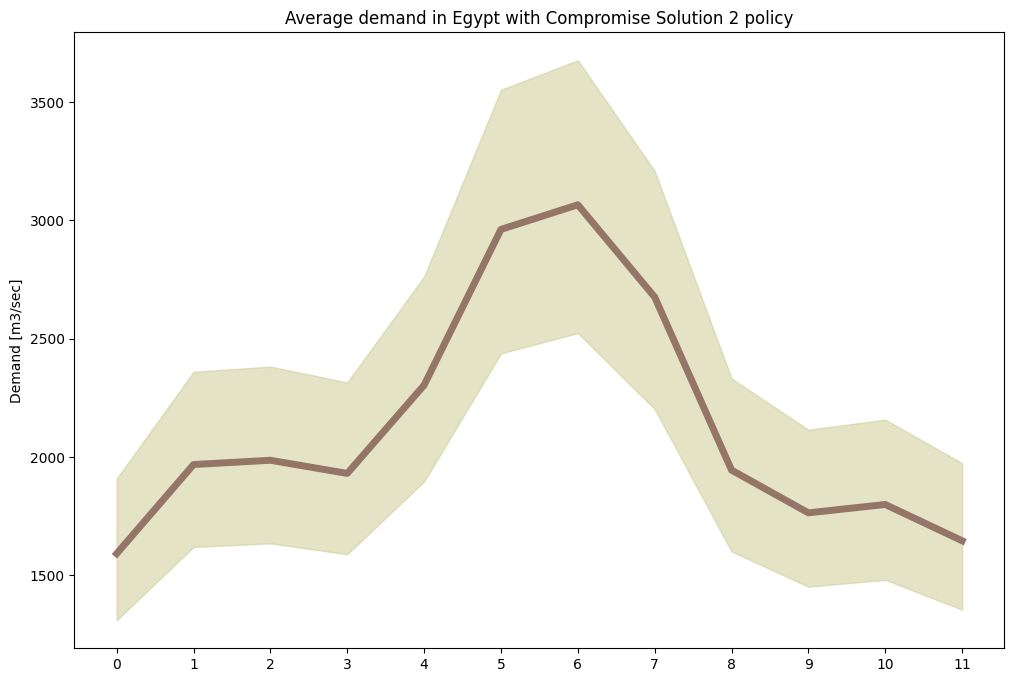

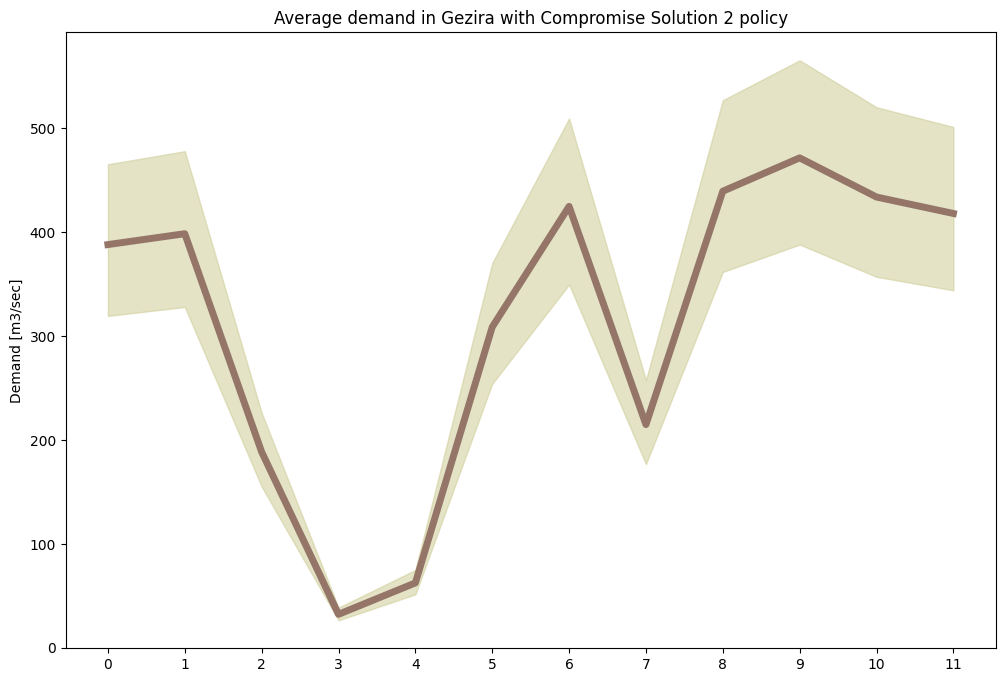

In [27]:
nile_model = ModelNile()
nile_model = generate_input_data(nile_model, sim_horizon=20)

for i, policy in enumerate(test_policies):
    
    nile_model.evaluate(policy)
    plotter = HydroModelPlotter(nile_model)
    plotter.plot_condensed_inflow_separated("GERD", policy_names[i])
    plotter.plot_condensed_release_separated("GERD", policy_names[i])
    plotter.plot_condensed_level_separated("GERD", policy_names[i])
    plotter.plot_level_with_limits("GERD")
    plotter.plot_condensed_inflow_separated("Roseires", policy_names[i])
    plotter.plot_condensed_release_separated("Roseires", policy_names[i])
    plotter.plot_condensed_level_separated("Roseires", policy_names[i])
    plotter.plot_level_with_limits("Roseires")
    
    plotter.plot_condensed_demand("Egypt", policy_names[i])
    plotter.plot_condensed_demand("Gezira", policy_names[i])
    

In [20]:
nile_model = generate_input_data(nile_model, sim_horizon=20)
nile_model.evaluate(best_ethiopia_hydro)

(34722.98767698067,
 734.532300865978,
 0.5625,
 42.9301825962105,
 0.0,
 62273176.16284869)

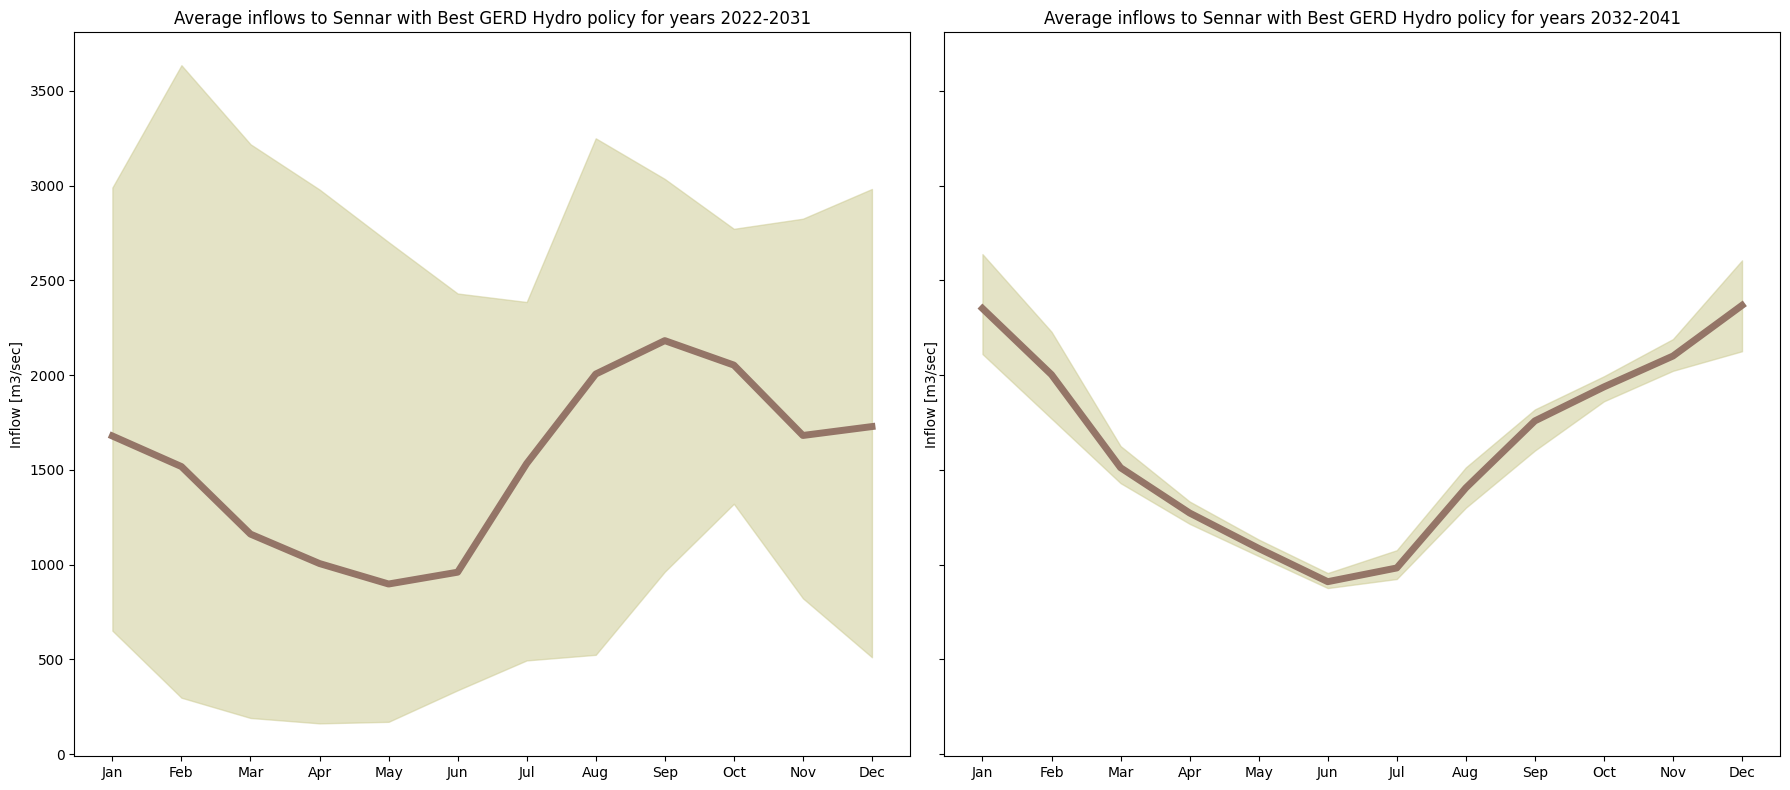

In [21]:
from plotter import HydroModelPlotter

plotter = HydroModelPlotter(nile_model)
plotter.plot_condensed_inflow_separated("Sennar", "Best GERD Hydro")

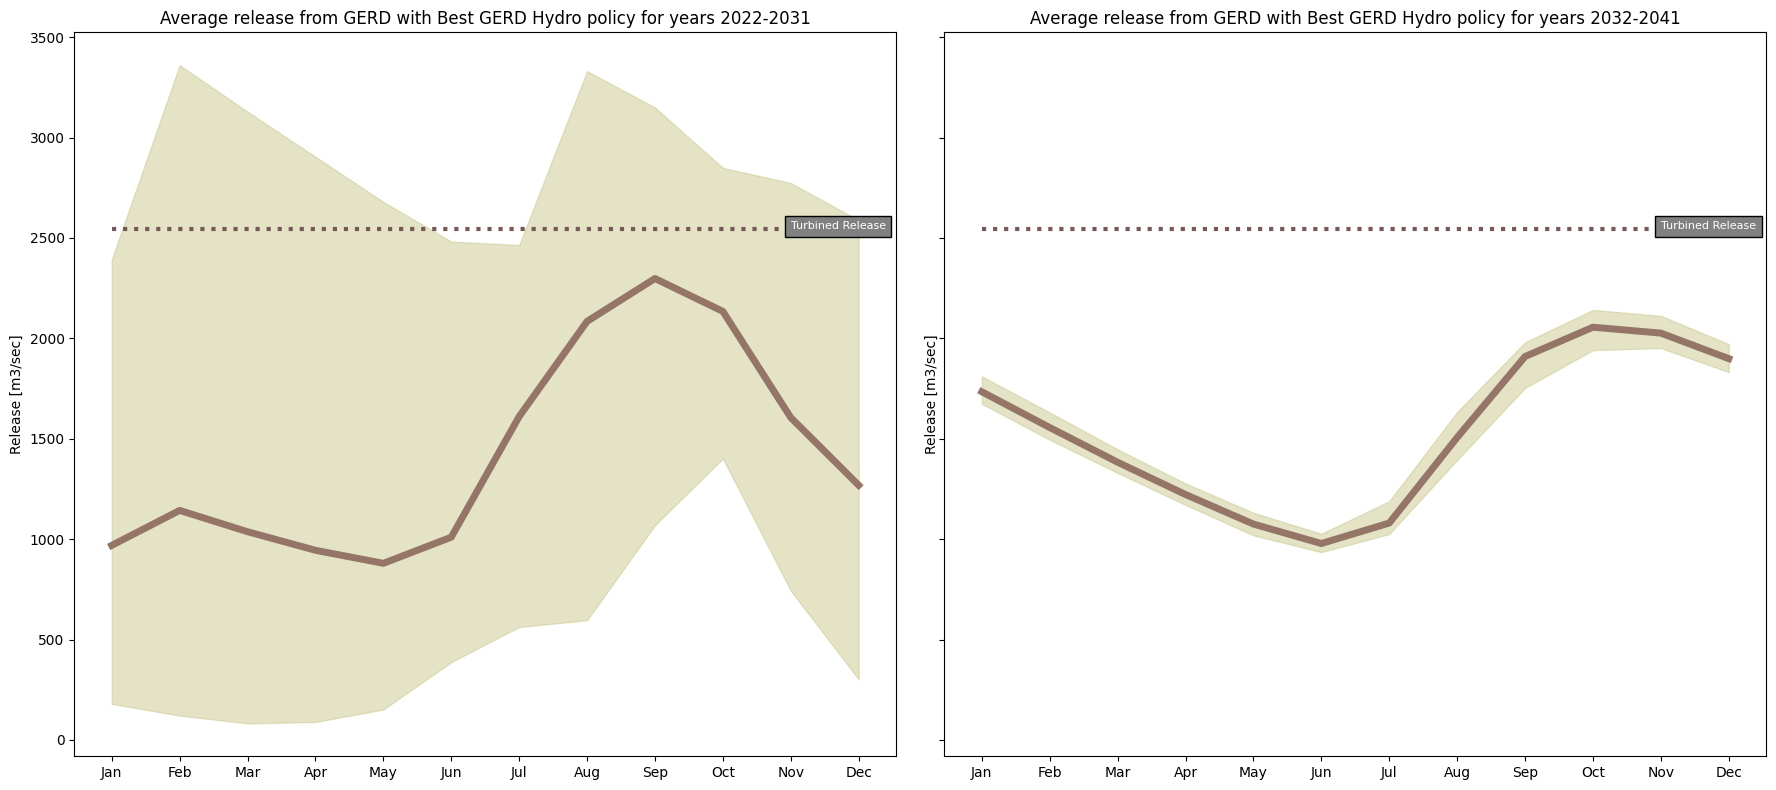

In [22]:
plotter.plot_condensed_release_separated("GERD", "Best GERD Hydro")

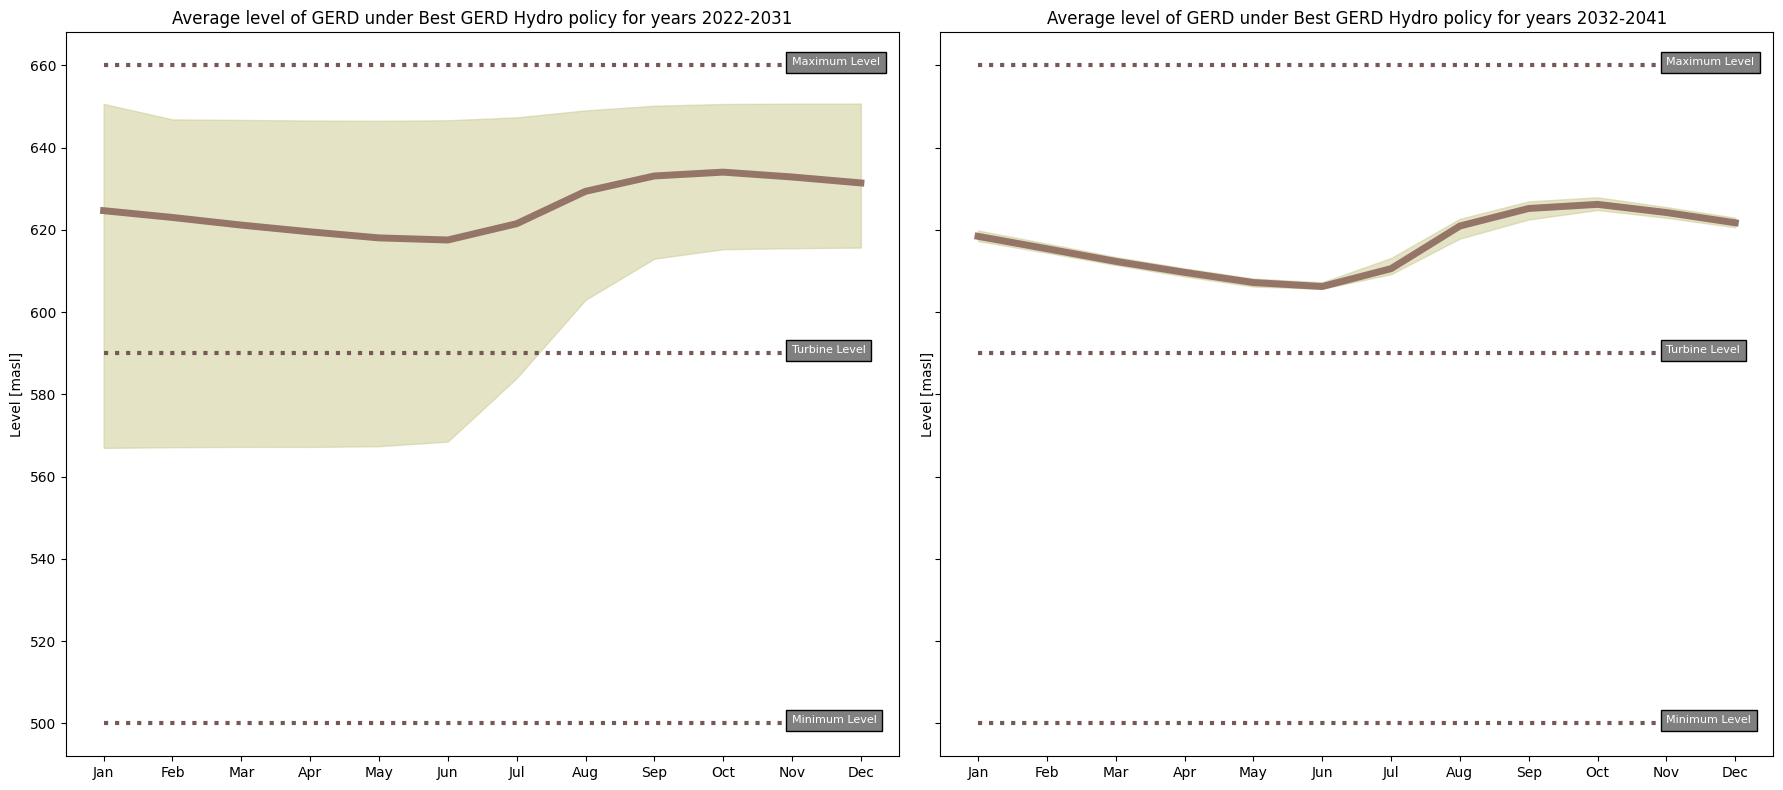

In [23]:
plotter.plot_condensed_level_separated("GERD", "Best GERD Hydro")

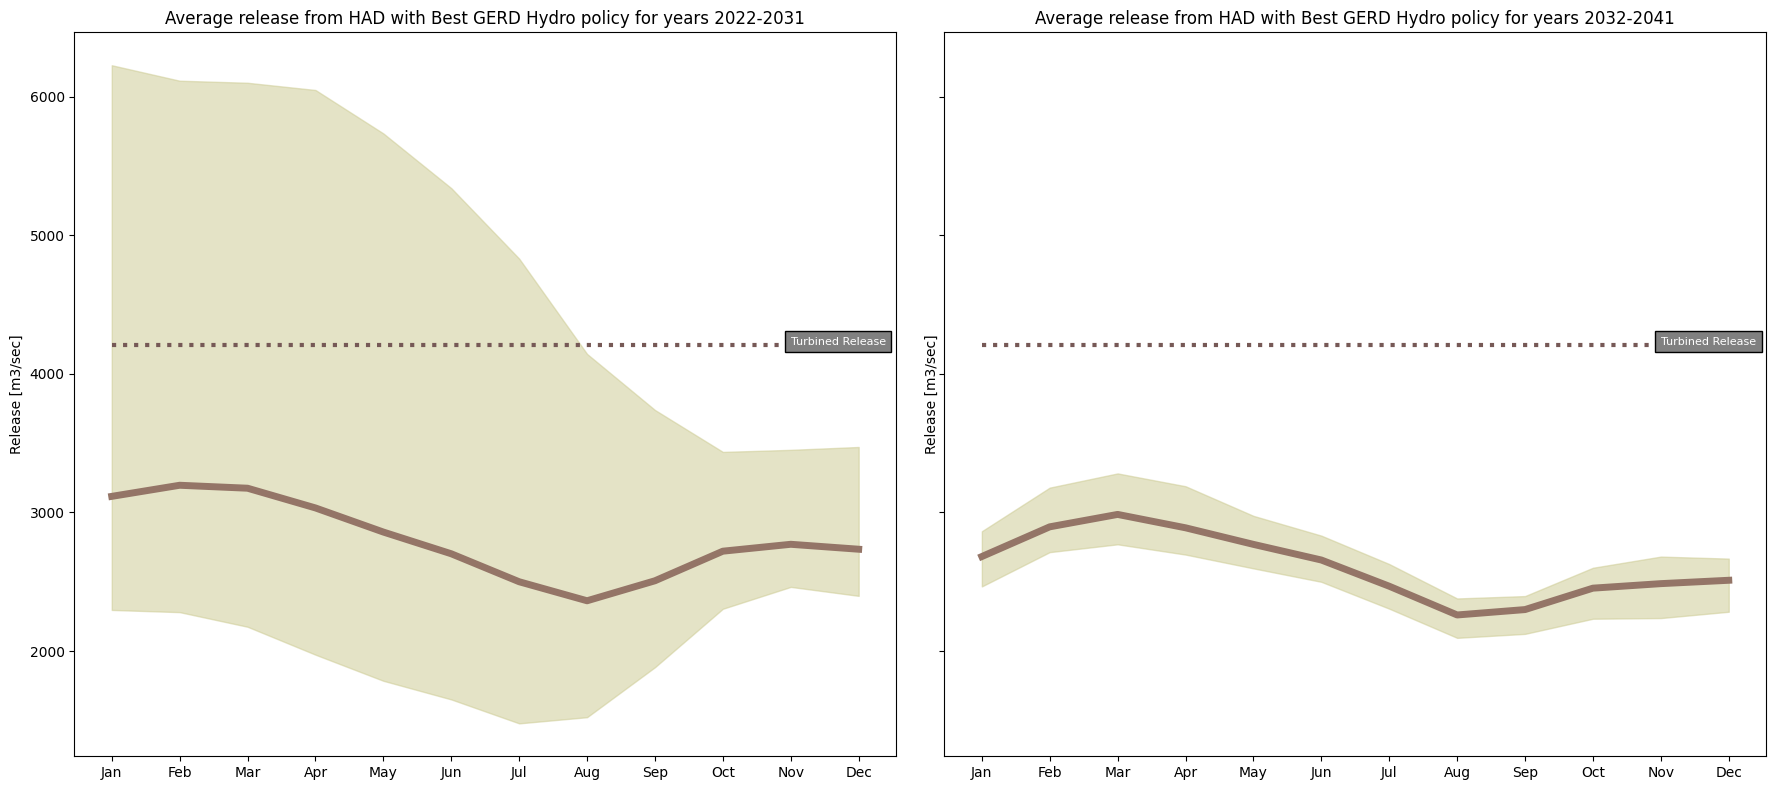

In [24]:
plotter.plot_condensed_release_separated("HAD", "Best GERD Hydro")

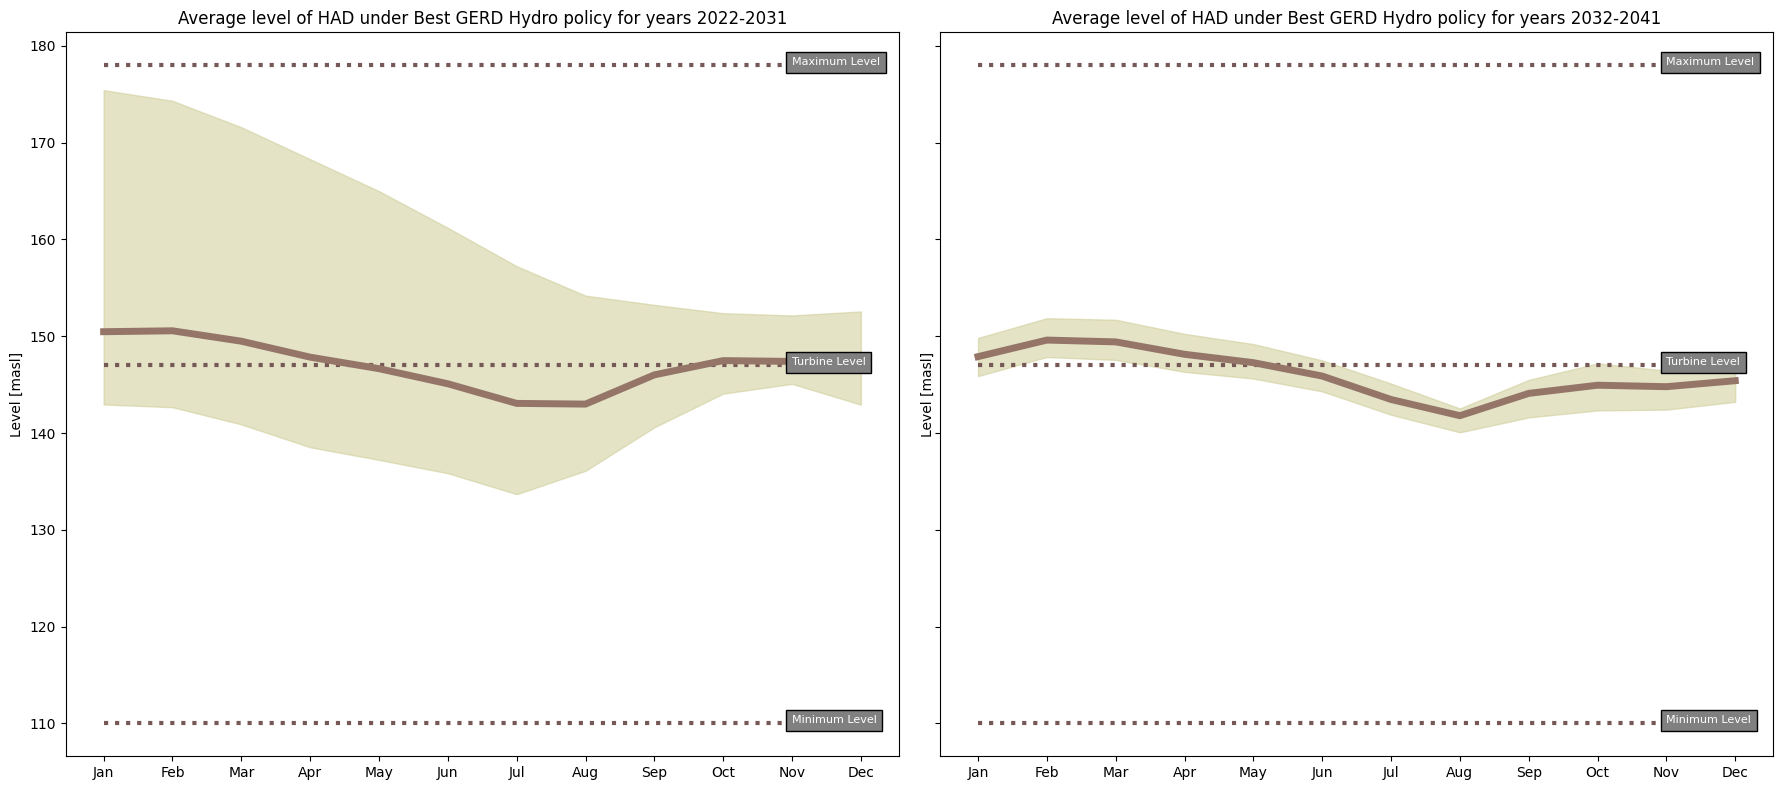

In [26]:
plotter.plot_condensed_level_separated("HAD", "Best GERD Hydro")

In [17]:
# test_policies = [best_egypt_irr_and_HAD, best_egypt_90, best_ethiopia_hydro]
# nile_model = generate_input_data(nile_model, sim_horizon=20)
# model_plotter = HydroModelPlotter(nile_model)

# for pol in test_policies:
#     nile_model.evaluate(pol)
#     model_plotter.plot_received_vs_demand_for_district("Egypt")
#     model_plotter.plot_received_vs_demand_for_district("Gezira")
    
#     for dam in nile_model.reservoir_names:
#         model_plotter.plot_level_with_limits(dam)
#         model_plotter.plot_levels_condensed(dam)
    

In [13]:
objectives

egypt_irr    egypt_90  egypt_low_had  sudan_irr  sudan_90  \
0    32860.160621  532.574401       0.000000  42.930183       0.0   
1    34722.987677  734.532301       0.562500  42.930183       0.0   
2    31422.095961  652.042734       0.562500  43.255449       0.0   
3     7609.454234   62.200044       0.000000  92.657943       0.0   
4    18689.382578  340.888240       0.095833   0.033902       0.0   
..            ...         ...            ...        ...       ...   
117  18141.428488  307.088646       0.162500   0.000000       0.0   
118  17270.116463  241.682454       0.000000   0.000000       0.0   
119  19805.577704  334.260212       0.016667   0.005124       0.0   
120  20382.644973  353.531612       0.000000   0.006364       0.0   
121  17662.380253  265.662812       0.295833   0.000000       0.0   

     ethiopia_hydro  
0      6.200764e+07  
1      6.227318e+07  
2      5.495098e+07  
3      1.255121e+05  
4      5.302814e+07  
..              ...  
117    5.304743e+07  
118    5.268096e+07  
119    5.303458e+07  
120    5.303422e+07  
121    5.304743e+07  

[122 rows x 6 columns]

In [14]:
new_order = ['egypt_irr',
 'ethiopia_hydro',
 'egypt_90',
 'egypt_low_had',
 'sudan_irr',
 'sudan_90',
 'class']

norm_df_ordered = norm_df.copy().reindex(columns=new_order)
norm_df_ordered

NameError: name 'norm_df' is not defined

In [ ]:
fig, ax = plt.subplots()
parallel_coordinates(norm_df_ordered, "class", ax=ax)

plt.show()

In [16]:
desire_couples

[(34722.98767698067, 7609.454234369528),
 (734.532300865978, 7.984832505047962),
 (0.5625, 0.0),
 (115.54578021230064, 0.0),
 (0.0, 0.0),
 (125512.14400044372, 62273176.16284869)]

In [ ]:
norm_df.describe()

In [ ]:
norm_df["class"] = 1

In [ ]:
parallel_coordinates(norm_df, "class")

In [ ]:
def parallel_plots(objectives_df):
    file_name='Best_objectives'

    names=['Egypt_irr','Egypt90_irr','Egypt_low_HAD','Sudan_irr', 'Sudan90_irr','Ethiopia_hydro']
    units=['m3','m3','none','m3','m3','MwH']

    mx=[]
    mn=[]
    for column in names:
        mx.append(str(round(objectives_df[column].max(), 1)))
        mn.append(str(round(objectives_df[column].min(), 1)))

    objectives_df=(objectives_df.max()-objectives_df)/(objectives_df.max()-objectives_df.min())
    objectives_df['Name'] = "All Solutions"
    for column in names:
        objectives_df = objectives_df.append(objectives_df.loc[objectives_df[column] == 1,:], ignore_index=True)
        objectives_df.iloc[-1,-1] = "Best " + column

    fig = plt.figure()

    ax1 = fig.add_subplot(111)

    gray='#bdbdbd'
    purple='#7a0177'
    green='#41ab5d'
    blue='#1d91c0'
    yellow='#fdaa09'
    pink='#c51b7d'

    parallel_coordinates(objectives_df,'Name', color= [gray,purple,yellow,blue], linewidth=7, alpha=.8)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=4, mode="expand", borderaxespad=1.5, fontsize=18)
    
    i=0
    ax1.set_xticks(np.arange(3))


    ax1.set_xticklabels([mx[i]+'\n'+'\n'+names[i]+'\n'+units[i], mx[i+1]+'\n'+'\n'+names[i+1]+'\n'+units[i+1],mx[i+2]+'\n'+'\n'+names[i+2]+'\n'+units[i+2]], fontsize=18)
    ax2 = ax1.twiny()
    ax2.set_xticks(np.arange(3))
    ax2.set_xticklabels([mn[i], mn[i+1],mn[i+2]], fontsize=18)
    ax1.get_yaxis().set_visible([])
    plt.text(1.02, 0.5, 'Direction of Preference $\\rightarrow$', {'color': '#636363', 'fontsize': 20},
             horizontalalignment='left',
             verticalalignment='center',
             rotation=90,
             clip_on=False,
             transform=plt.gca().transAxes)

    fig.set_size_inches(17.5, 9)